In [21]:
import pandas as pd
import numpy as np
import ast

import os
import matplotlib.pyplot as plt
import seaborn as sns
from plinder_analysis_utils import DockingAnalysisBase, PoseBustersAnalysis, PropertyAnalysis

import statsmodels.formula.api as smf

# Load Data 

In [22]:
BUST_TEST_COLUMNS = [
    # accuracy #
    "rmsd_≤_2å",
    # chemical validity and consistency #
    "mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "molecular_formula",
    "molecular_bonds",
    "tetrahedral_chirality",
    "double_bond_stereochemistry",
    # intramolecular validity #
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "double_bond_flatness",
    "internal_energy",
    # intermolecular validity #
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
]

In [23]:
df_combined = pd.read_csv("plinder_set_0_annotated.csv")
# build a boolean mask: drop any row where covalent, ionic or has_ion is True
# mask = ~(
#     df_combined['ligand_is_covalent'] |
#     df_combined['ligand_is_ion'] |
#     df_combined['has_ion'] |
#     df_combined['ligand_is_cofactor']
# )

# # filter and reset index
# df_combined = df_combined.loc[mask].reset_index(drop=True)
print("Filtered shape:", df_combined.shape)

Filtered shape: (26726, 154)


/var/folders/bb/dyy85zps4_lg79d6g6g48ms00000gn/T/ipykernel_78820/2443103706.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined = pd.read_csv("plinder_set_0_annotated.csv")


# Analysis

In [24]:
# Initialize the analysis object
analysis = PoseBustersAnalysis(df_combined)

## Universal

Analyzing PoseBusters metrics for 16 cases where all methods succeed
and 55 cases where all methods fail


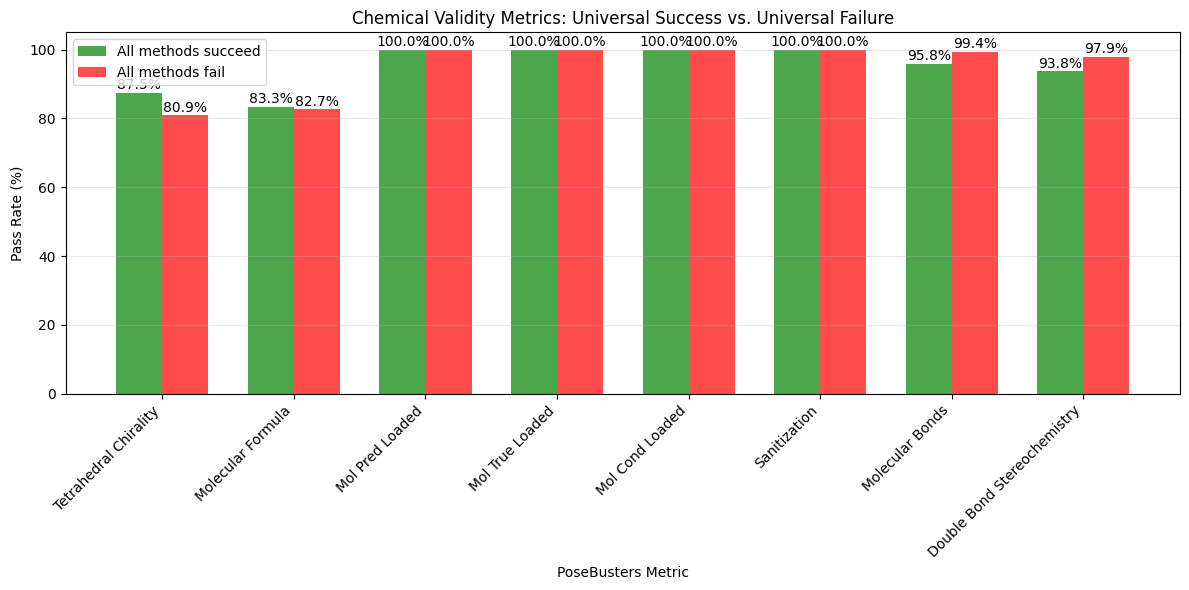

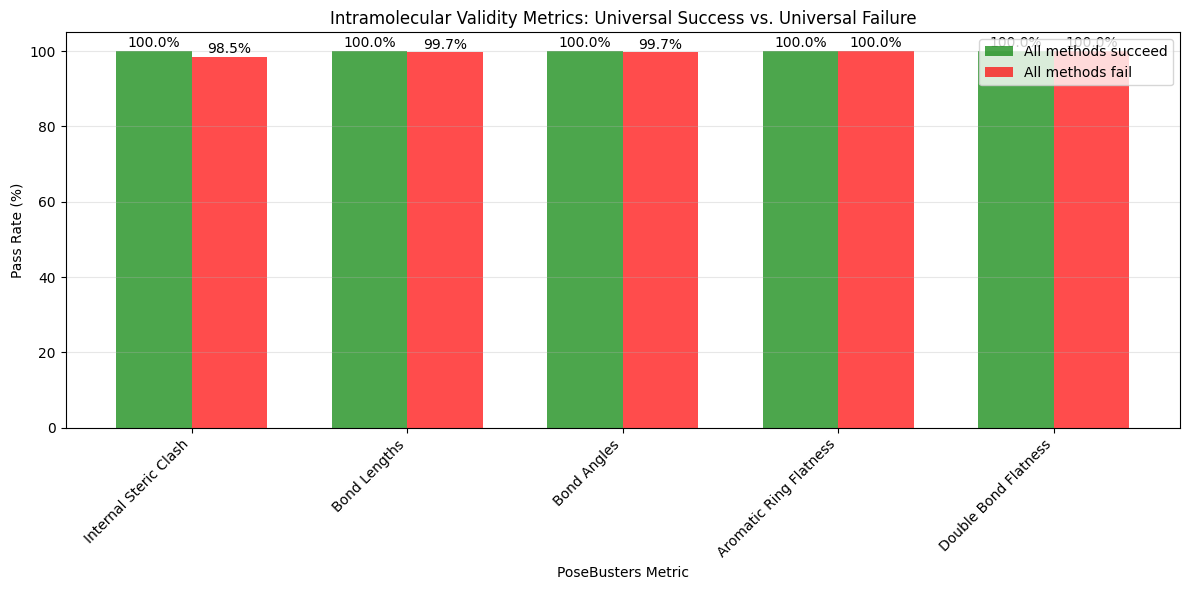

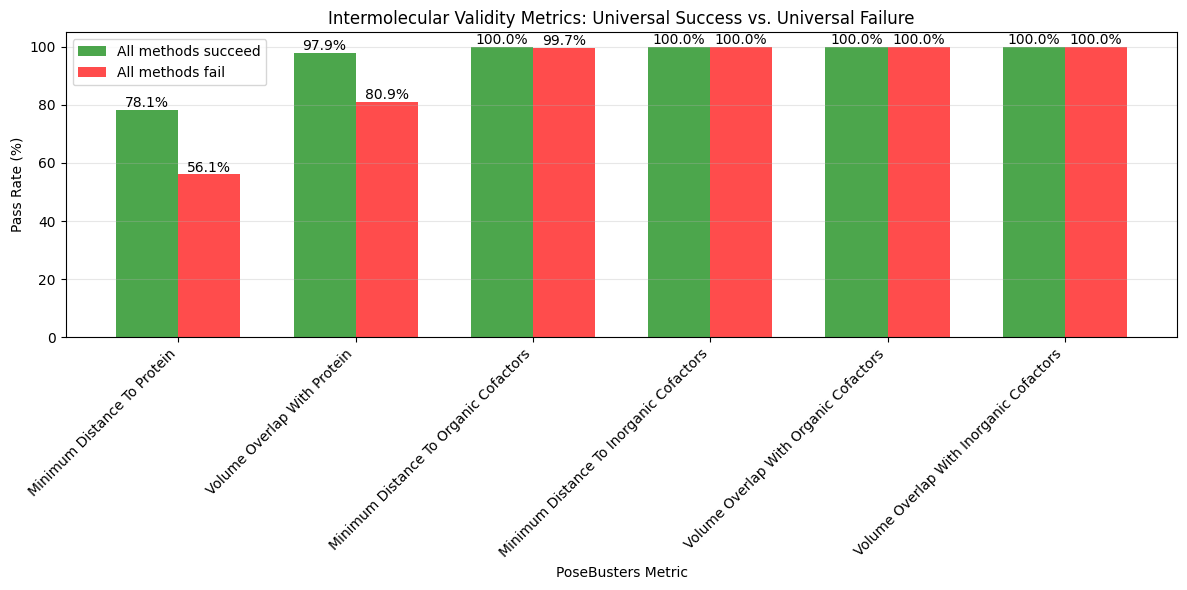

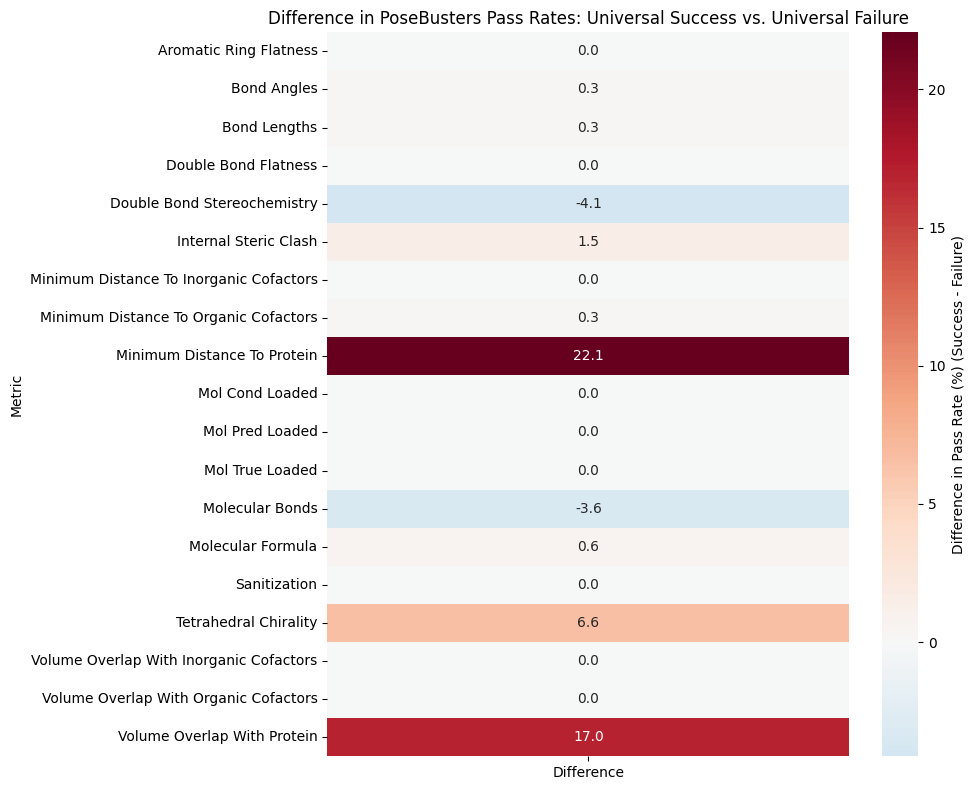


No statistically significant differences found in PoseBusters metrics.


In [5]:
# List of methods to include in analysis
methods = ['diffdock_pocket_only', 'chai-1', 'icm', 'gnina', 'surfdock', 'vina']

# Run the universal analysis
universal_results = analysis.analyze_universal(
    methods=methods,
    rmsd_threshold=2.0,
    plot=True
)

# Access key results
success_proteins = universal_results['all_success_proteins']
failure_proteins = universal_results['all_failure_proteins']
significant_metrics = universal_results['significant_metrics']

### physics-based

In [20]:
df_combined.shape, df_combined['protein'].nunique()

((26726, 169), 1036)

Analyzing PoseBusters metrics for 68 cases where all methods succeed
and 265 cases where all methods fail


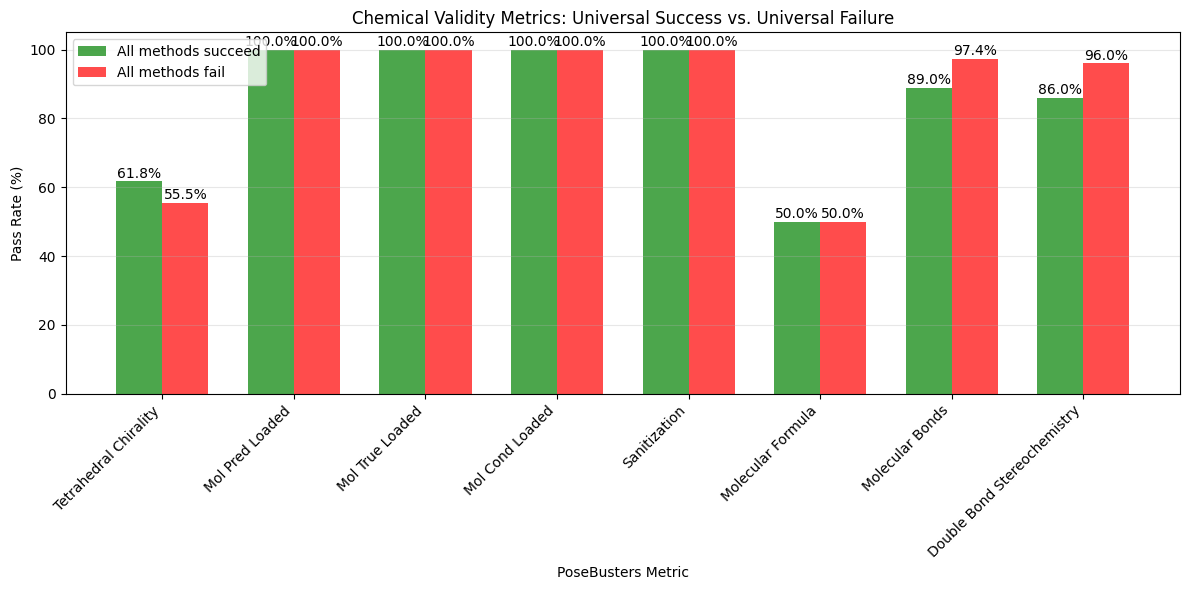

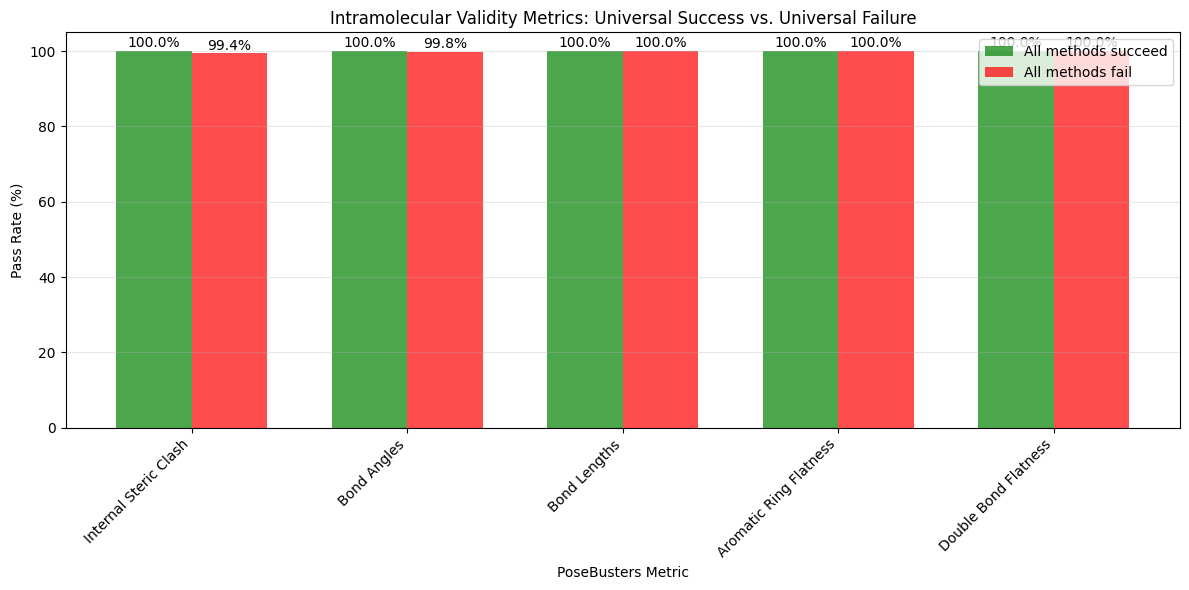

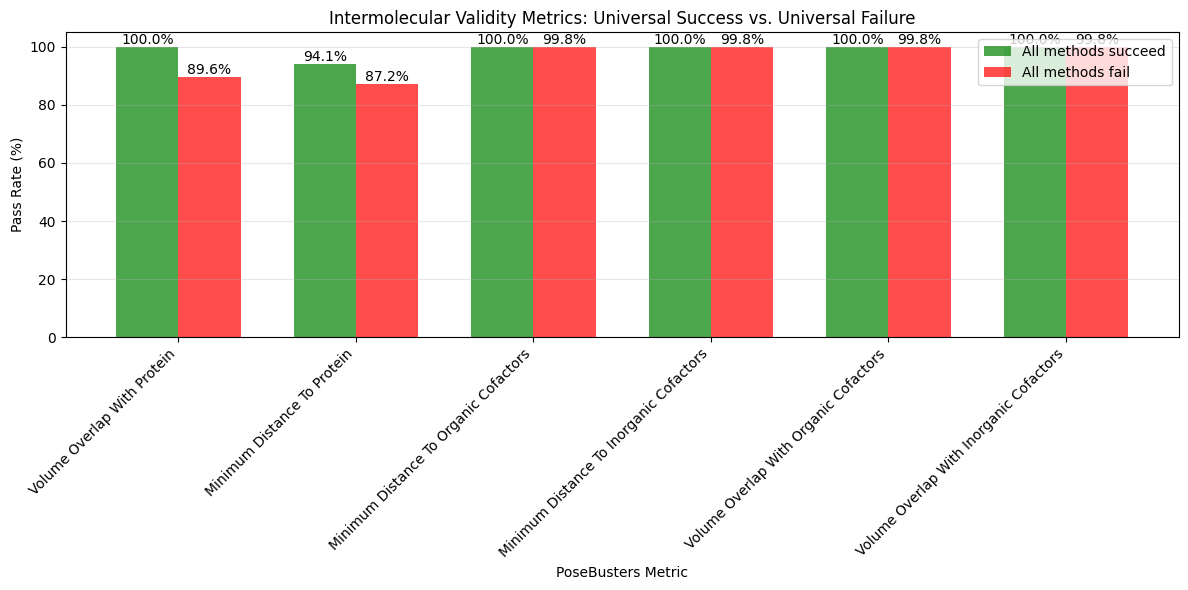

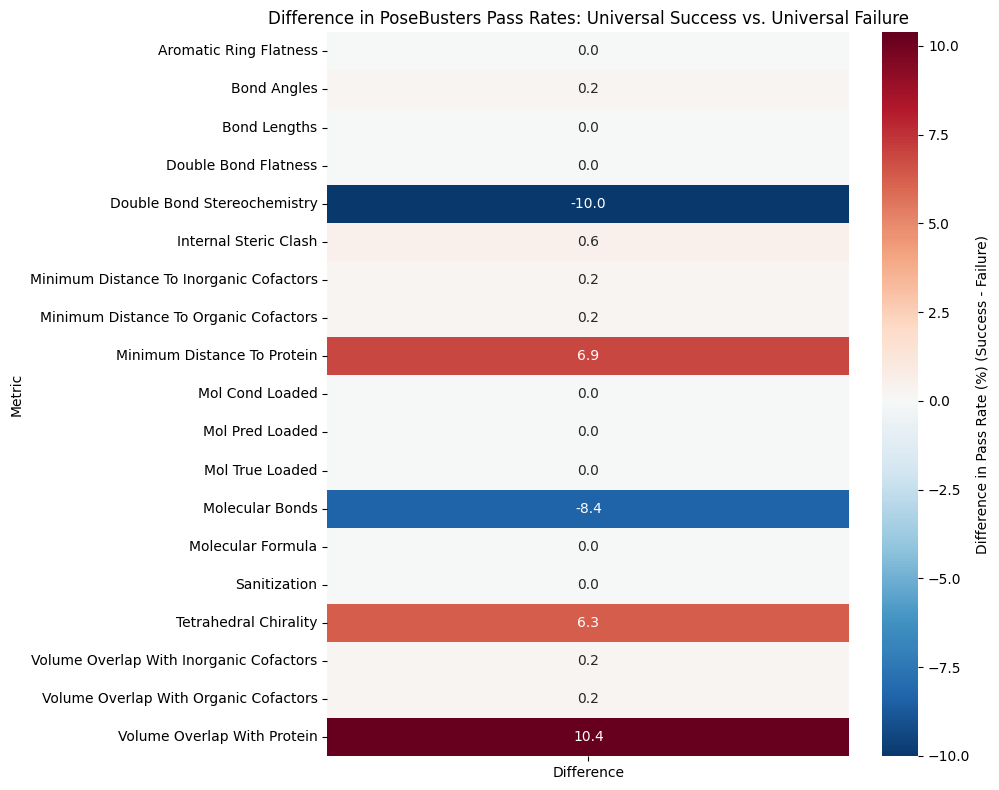


No statistically significant differences found in PoseBusters metrics.


In [6]:
# List of methods to include in analysis
methods = ['vina', 'icm']

# Run the universal analysis
universal_results = analysis.analyze_universal(
    methods=methods,
    rmsd_threshold=2.0,
    plot=True
)

# Access key results
success_proteins = universal_results['all_success_proteins']
failure_proteins = universal_results['all_failure_proteins']
significant_metrics = universal_results['significant_metrics']

#### ML-based 

Analyzing PoseBusters metrics for 162 cases where all methods succeed
and 93 cases where all methods fail


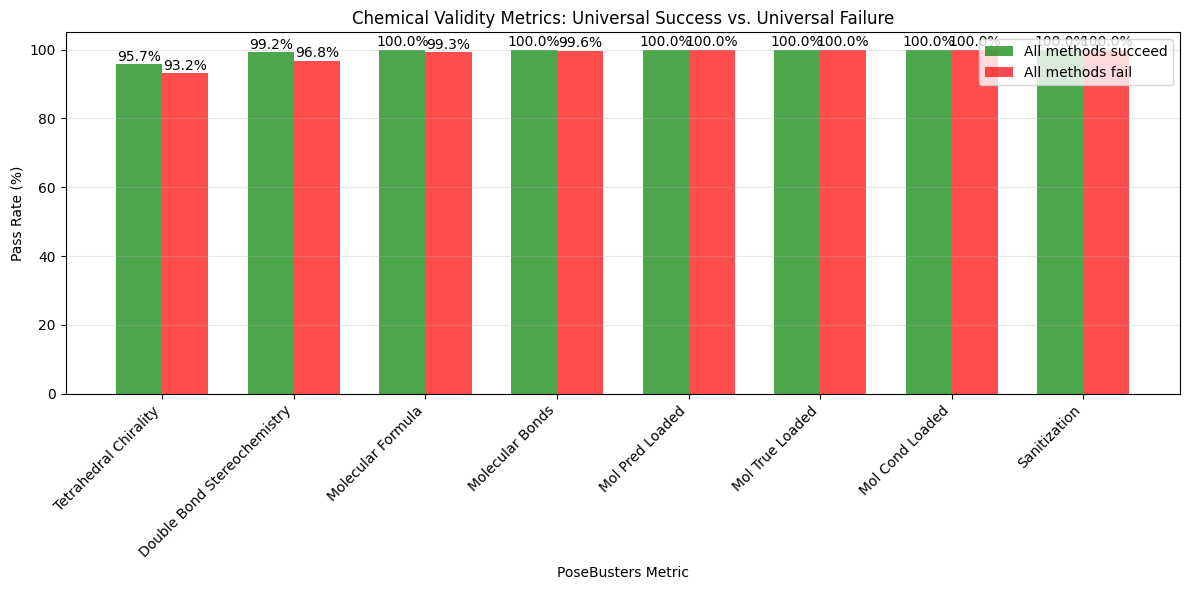

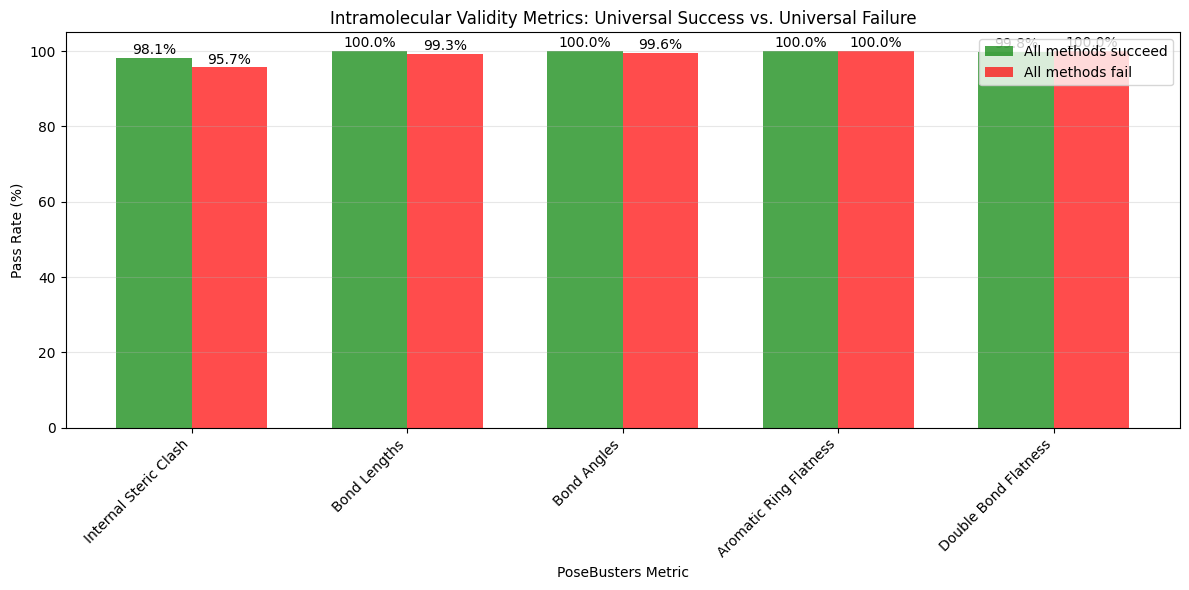

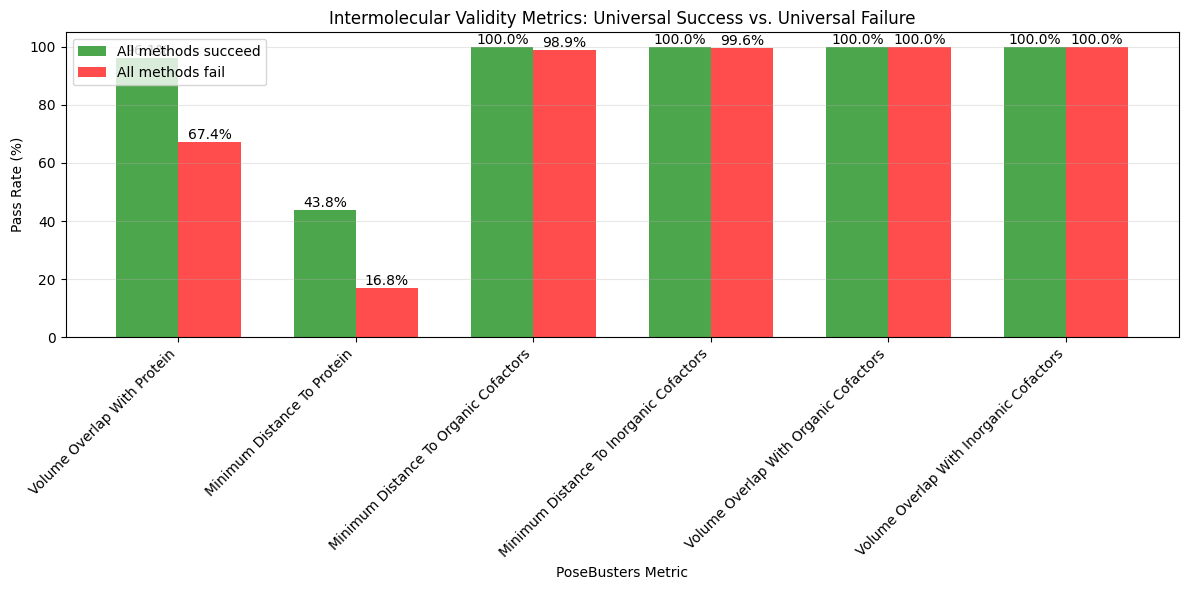

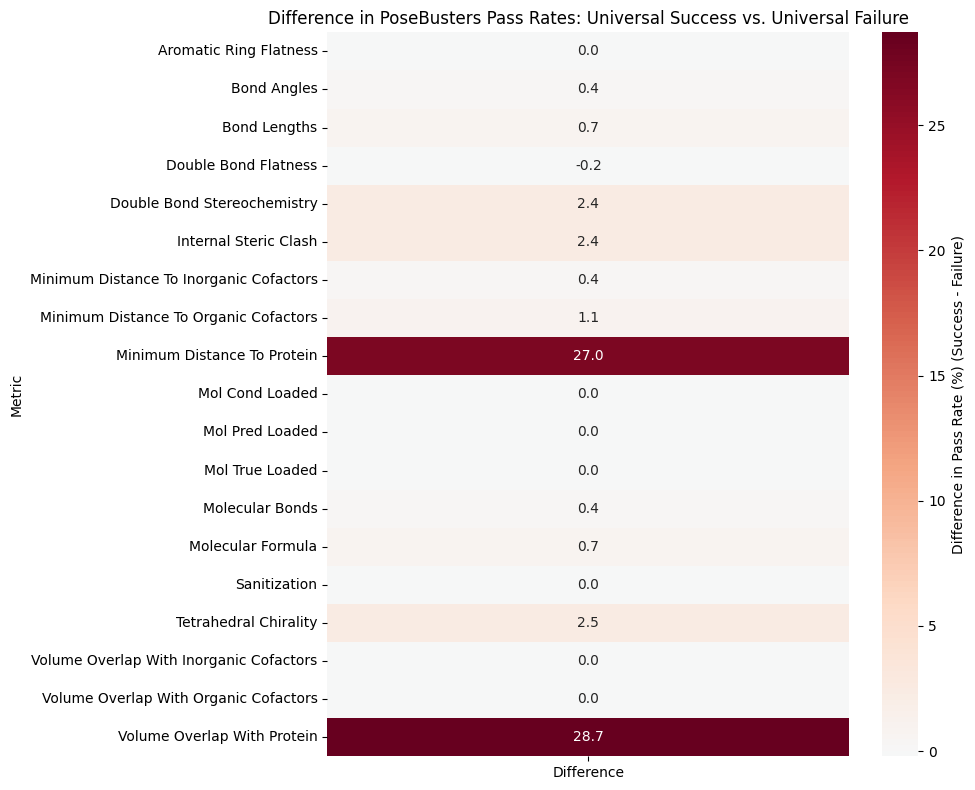


No statistically significant differences found in PoseBusters metrics.


In [7]:
# List of methods to include in analysis
methods = ['diffdock_pocket_only', 'chai-1', 'surfdock',]

# Run the universal analysis
universal_results = analysis.analyze_universal(
    methods=methods,
    rmsd_threshold=2.0,
    plot=True
)

# Access key results
success_proteins = universal_results['all_success_proteins']
failure_proteins = universal_results['all_failure_proteins']
significant_metrics = universal_results['significant_metrics']

## Individual

### ICM

Method: icm
Total proteins: 988
Success rate (RMSD ≤ 2.0Å): 63.56%


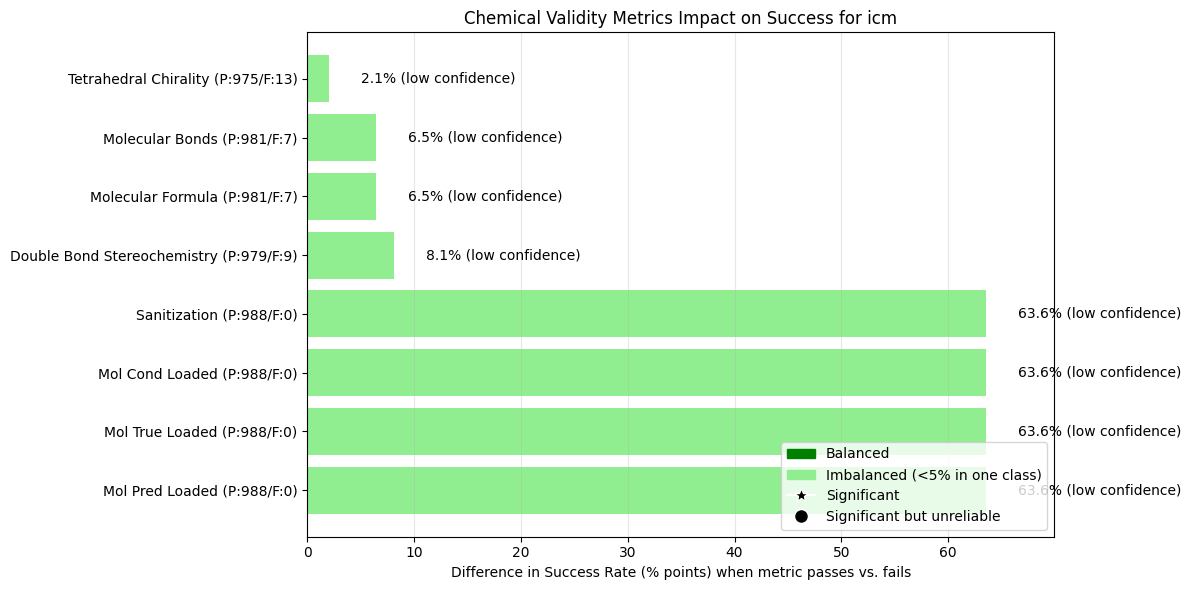

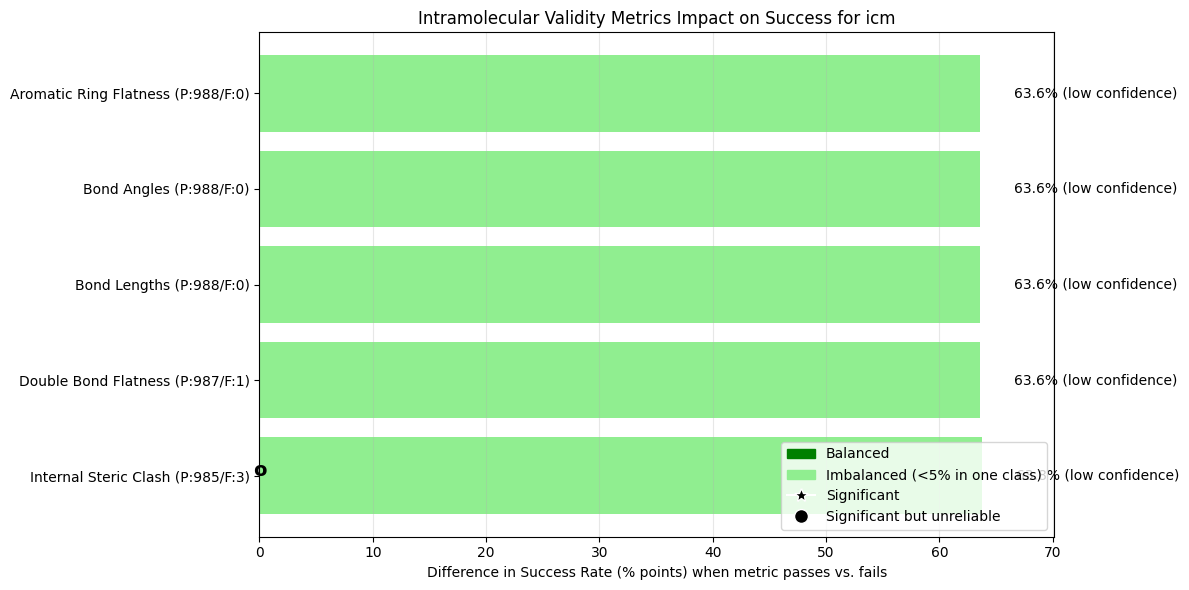

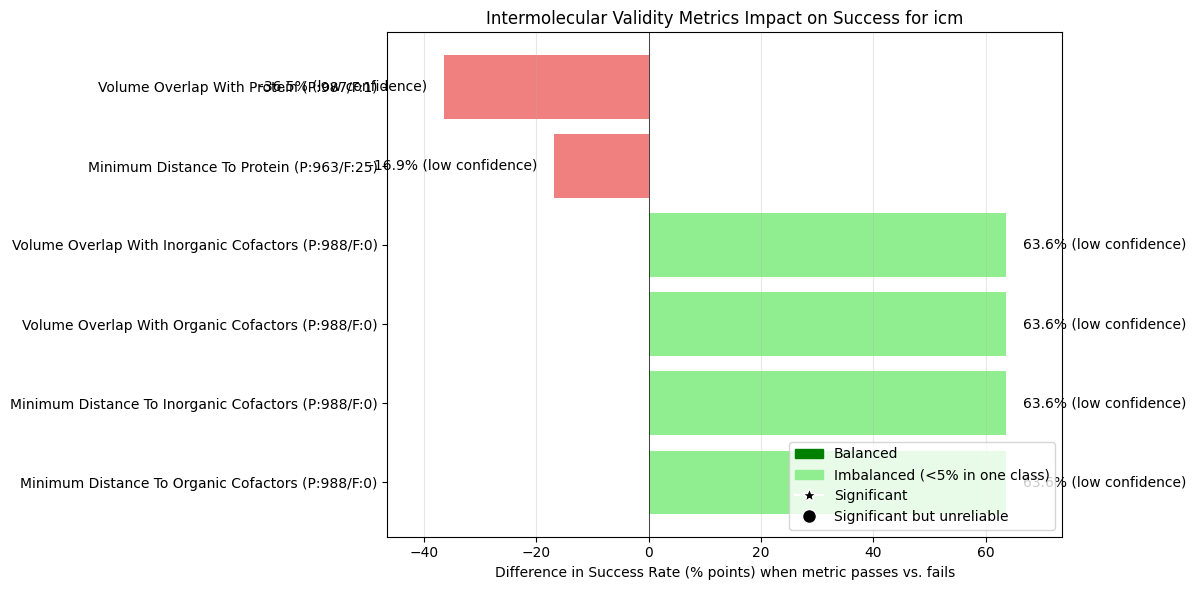


Metrics with significant impact on success rate:

Chemical Validity: No significant metrics found

Intramolecular Validity:
- internal_steric_clash: Success rate 63.8% when pass vs. 0.0% when fail (diff: 63.8%, p=0.0481, pass/fail counts: 985/3) (LOW CONFIDENCE due to imbalance)

Intermolecular Validity: No significant metrics found

Note: The following metrics have severe class imbalance (one class < 5% of data):
- mol_pred_loaded: Only 0 samples (0.00%) fail this metric
- mol_true_loaded: Only 0 samples (0.00%) fail this metric
- mol_cond_loaded: Only 0 samples (0.00%) fail this metric
- sanitization: Only 0 samples (0.00%) fail this metric
- molecular_formula: Only 7 samples (0.71%) fail this metric
- molecular_bonds: Only 7 samples (0.71%) fail this metric
- tetrahedral_chirality: Only 13 samples (1.32%) fail this metric
- double_bond_stereochemistry: Only 9 samples (0.91%) fail this metric
- bond_lengths: Only 0 samples (0.00%) fail this metric
- bond_angles: Only 0 samples (0.00

In [8]:
# Analyze a single method with default RMSD threshold of 2.0Å
single_method_results = analysis.analyze_single_method(
    method="icm",
    rmsd_threshold=2.0,
    imbalance_threshold=0.05,
    plot=True  # Generate visualization plots
)

# Access the results
success_rate = single_method_results['overall_success_rate']
significant_metrics = single_method_results['significant_metrics']

### gnina

Method: gnina
Total proteins: 1032
Success rate (RMSD ≤ 2.0Å): 73.16%


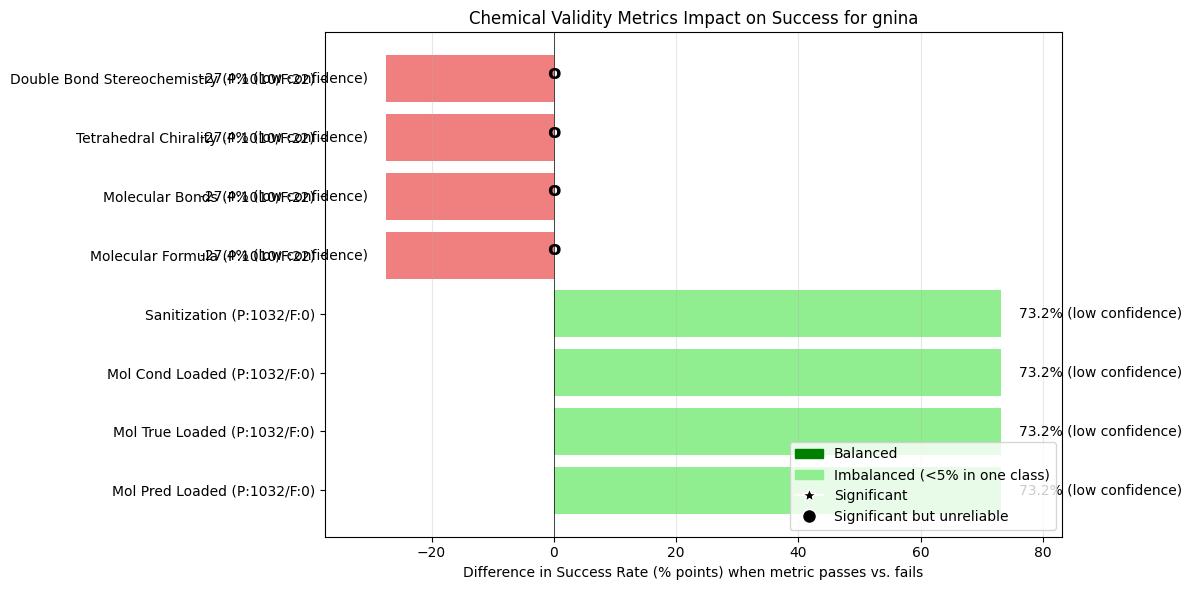

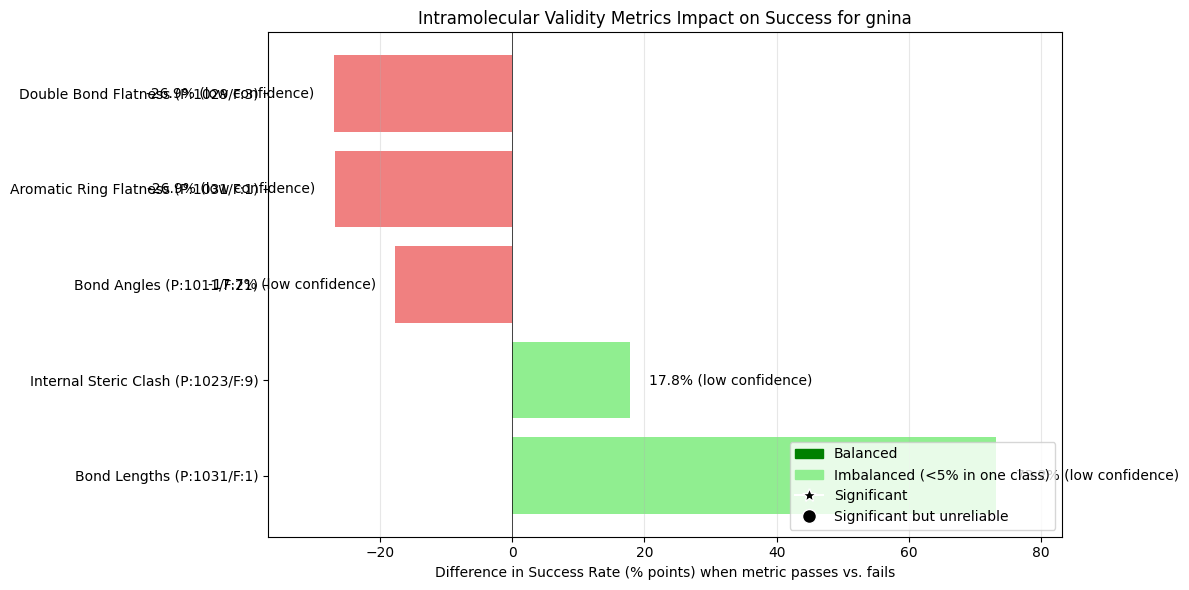

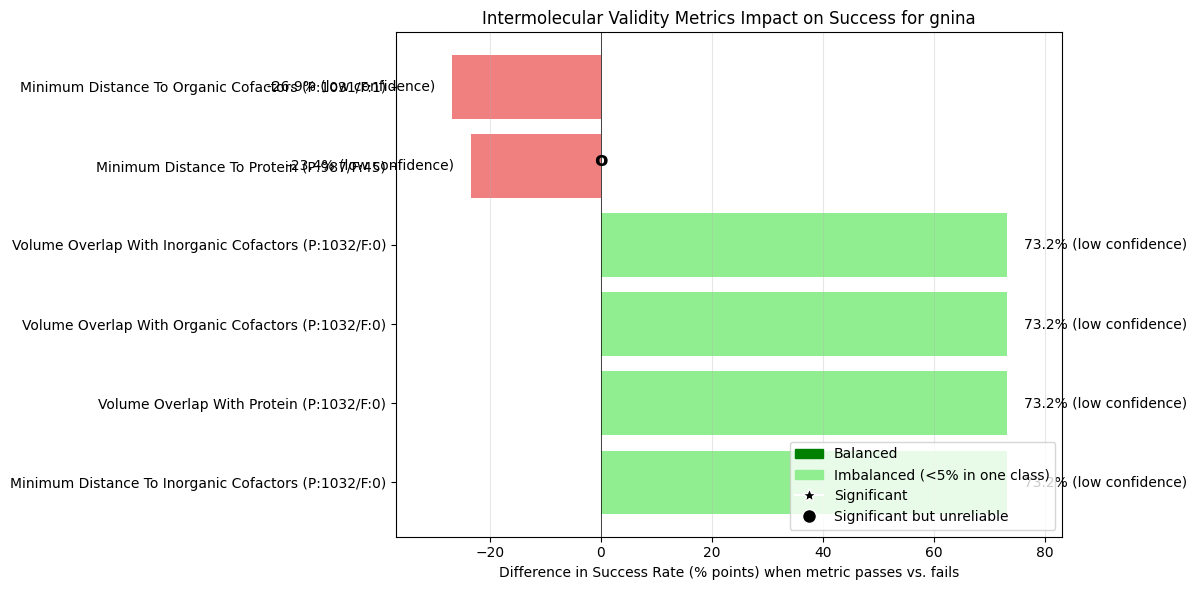


Metrics with significant impact on success rate:

Chemical Validity:
- molecular_formula: Success rate 72.6% when pass vs. 100.0% when fail (diff: -27.4%, p=0.0012, pass/fail counts: 1010/22) (LOW CONFIDENCE due to imbalance)
- molecular_bonds: Success rate 72.6% when pass vs. 100.0% when fail (diff: -27.4%, p=0.0012, pass/fail counts: 1010/22) (LOW CONFIDENCE due to imbalance)
- tetrahedral_chirality: Success rate 72.6% when pass vs. 100.0% when fail (diff: -27.4%, p=0.0012, pass/fail counts: 1010/22) (LOW CONFIDENCE due to imbalance)
- double_bond_stereochemistry: Success rate 72.6% when pass vs. 100.0% when fail (diff: -27.4%, p=0.0012, pass/fail counts: 1010/22) (LOW CONFIDENCE due to imbalance)

Intramolecular Validity: No significant metrics found

Intermolecular Validity:
- minimum_distance_to_protein: Success rate 72.1% when pass vs. 95.6% when fail (diff: -23.4%, p=0.0002, pass/fail counts: 987/45) (LOW CONFIDENCE due to imbalance)

Note: The following metrics have severe cla

In [9]:
# Analyze a single method with default RMSD threshold of 2.0Å
single_method_results = analysis.analyze_single_method(
    method="gnina",
    rmsd_threshold=2.0,
    imbalance_threshold=0.05,
    plot=True  # Generate visualization plots
)

# Access the results
success_rate = single_method_results['overall_success_rate']
significant_metrics = single_method_results['significant_metrics']

### vina

Method: vina
Total proteins: 641
Success rate (RMSD ≤ 2.0Å): 13.57%


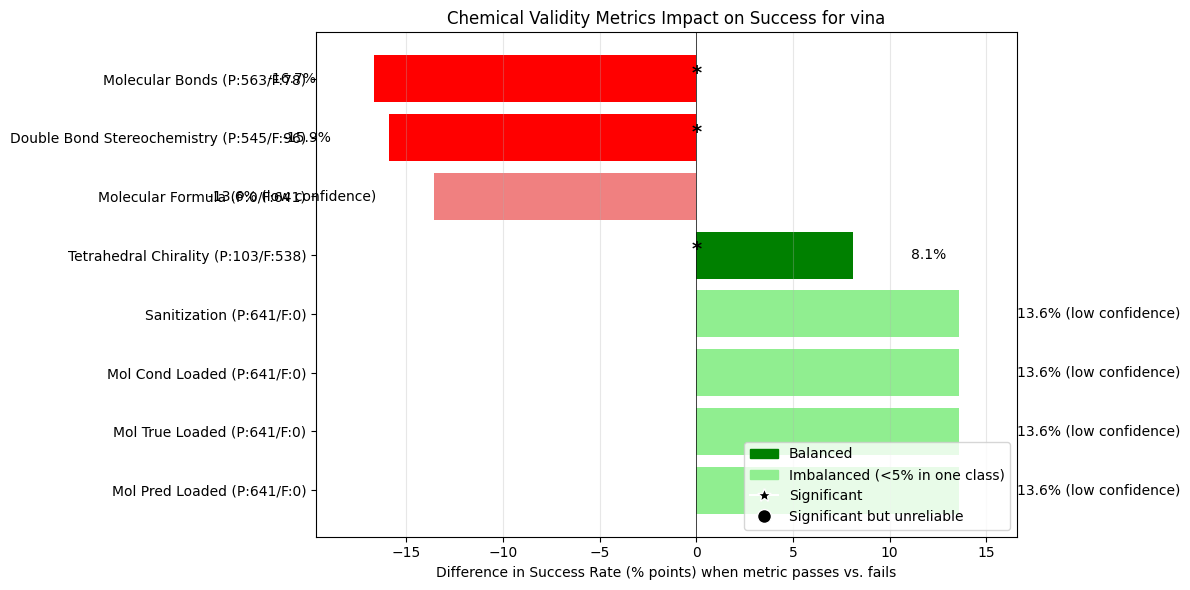

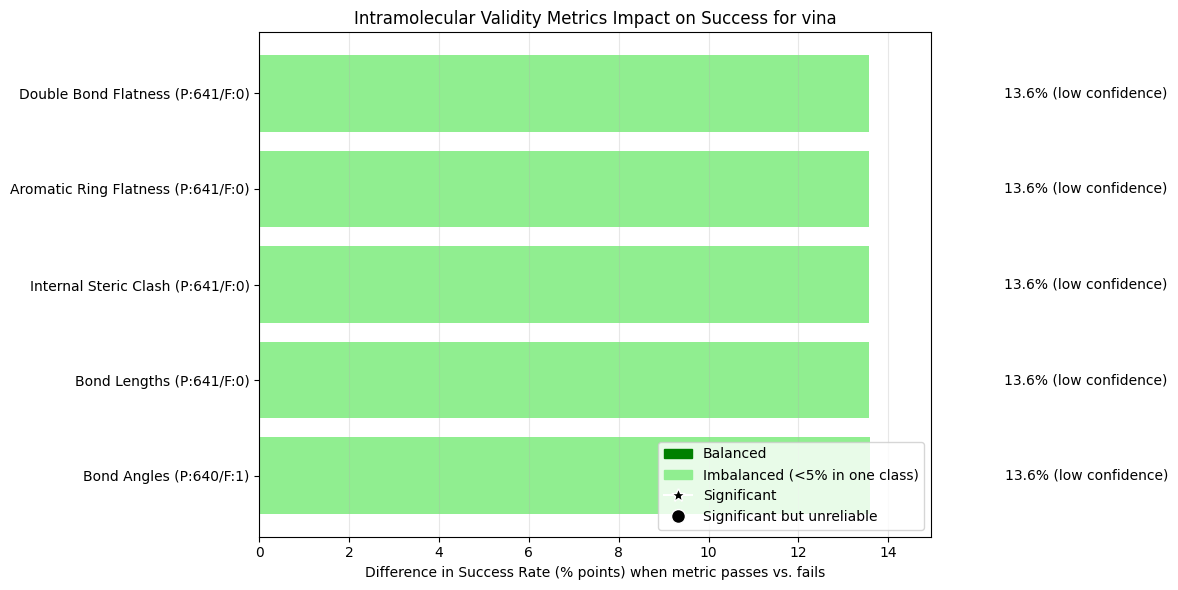

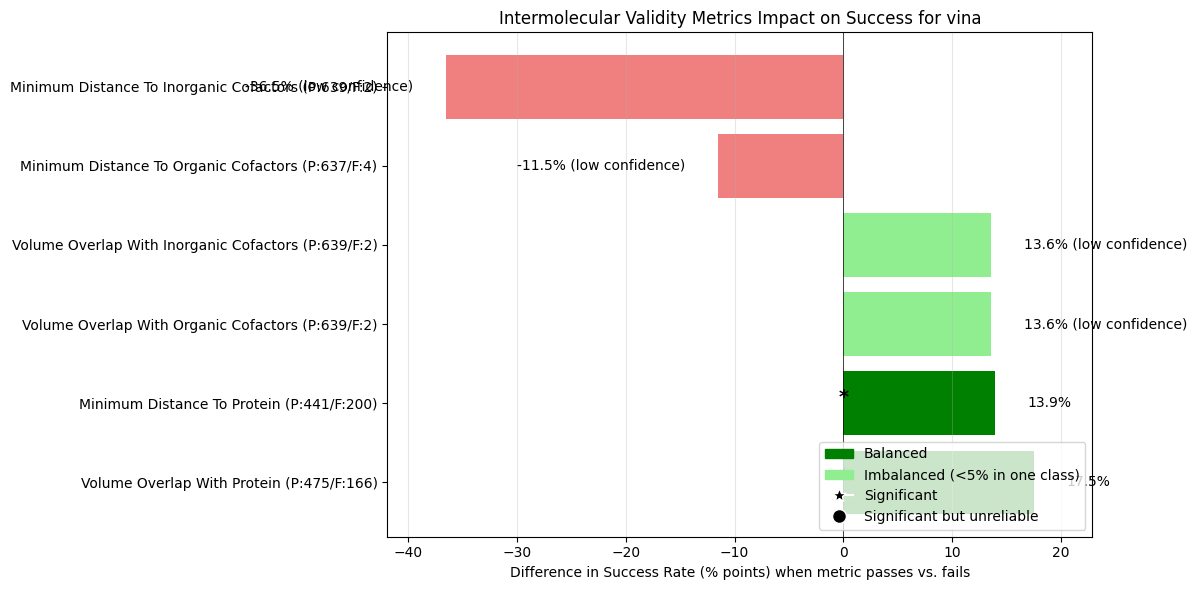


Metrics with significant impact on success rate:

Chemical Validity:
- molecular_bonds: Success rate 11.5% when pass vs. 28.2% when fail (diff: -16.7%, p=0.0003, pass/fail counts: 563/78)
- tetrahedral_chirality: Success rate 20.4% when pass vs. 12.3% when fail (diff: 8.1%, p=0.0398, pass/fail counts: 103/538)
- double_bond_stereochemistry: Success rate 11.2% when pass vs. 27.1% when fail (diff: -15.9%, p=0.0001, pass/fail counts: 545/96)

Intramolecular Validity: No significant metrics found

Intermolecular Validity:
- minimum_distance_to_protein: Success rate 17.9% when pass vs. 4.0% when fail (diff: 13.9%, p=0.0000, pass/fail counts: 441/200)
- volume_overlap_with_protein: Success rate 18.1% when pass vs. 0.6% when fail (diff: 17.5%, p=0.0000, pass/fail counts: 475/166)

Note: The following metrics have severe class imbalance (one class < 5% of data):
- mol_pred_loaded: Only 0 samples (0.00%) fail this metric
- mol_true_loaded: Only 0 samples (0.00%) fail this metric
- mol_cond_loa

In [10]:
# Analyze a single method with default RMSD threshold of 2.0Å
single_method_results = analysis.analyze_single_method(
    method="vina",
    rmsd_threshold=2.0,
    imbalance_threshold=0.05,
    plot=True  # Generate visualization plots
)

# Access the results
success_rate = single_method_results['overall_success_rate']
significant_metrics = single_method_results['significant_metrics']

### surfdock

Method: surfdock
Total proteins: 681
Success rate (RMSD ≤ 2.0Å): 76.21%


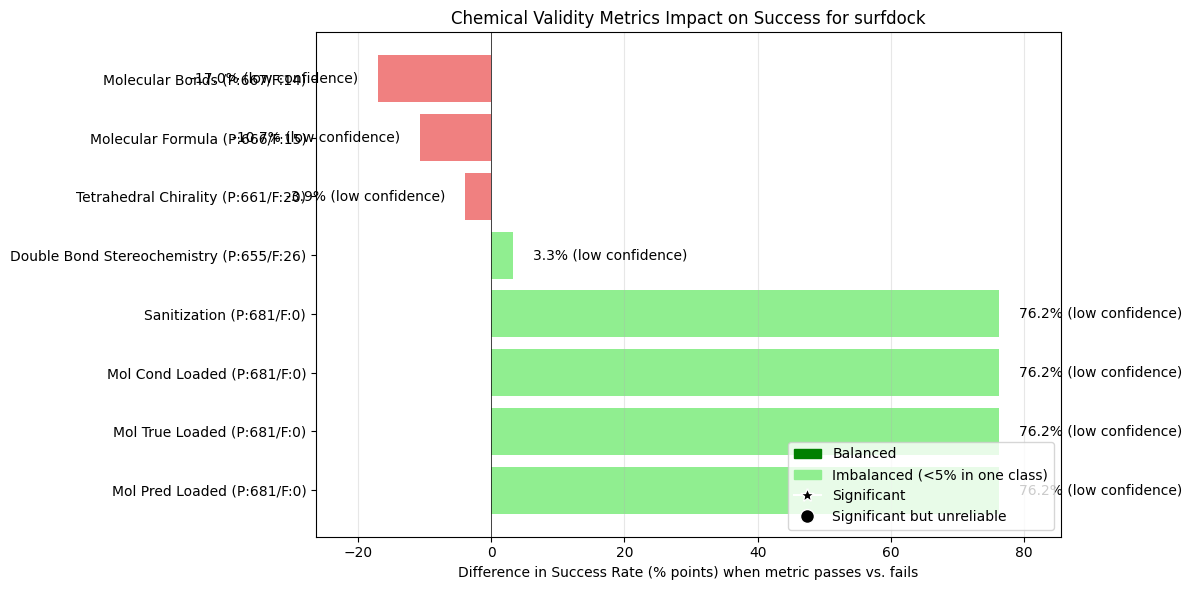

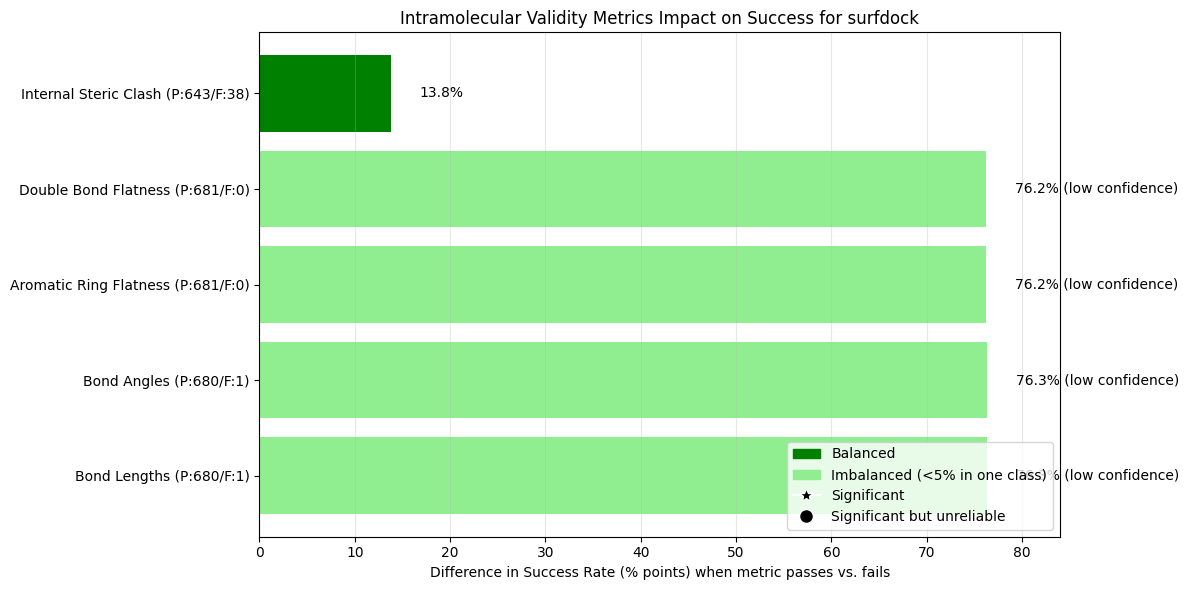

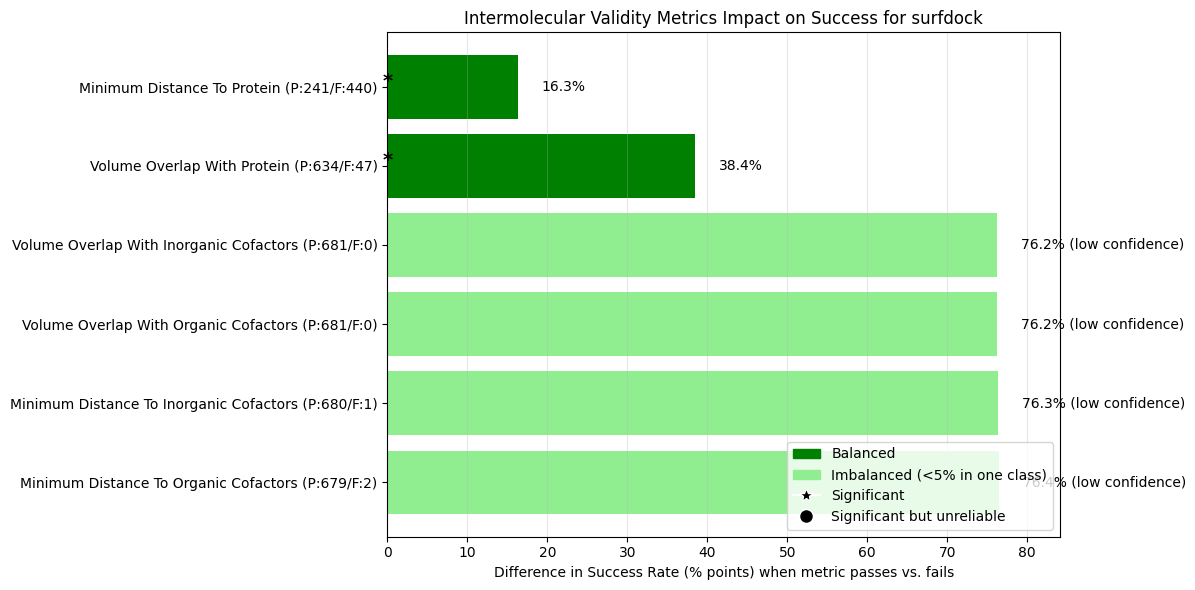


Metrics with significant impact on success rate:

Chemical Validity: No significant metrics found

Intramolecular Validity: No significant metrics found

Intermolecular Validity:
- minimum_distance_to_protein: Success rate 86.7% when pass vs. 70.5% when fail (diff: 16.3%, p=0.0000, pass/fail counts: 241/440)
- volume_overlap_with_protein: Success rate 78.9% when pass vs. 40.4% when fail (diff: 38.4%, p=0.0000, pass/fail counts: 634/47)

Note: The following metrics have severe class imbalance (one class < 5% of data):
- mol_pred_loaded: Only 0 samples (0.00%) fail this metric
- mol_true_loaded: Only 0 samples (0.00%) fail this metric
- mol_cond_loaded: Only 0 samples (0.00%) fail this metric
- sanitization: Only 0 samples (0.00%) fail this metric
- molecular_formula: Only 15 samples (2.20%) fail this metric
- molecular_bonds: Only 14 samples (2.06%) fail this metric
- tetrahedral_chirality: Only 20 samples (2.94%) fail this metric
- double_bond_stereochemistry: Only 26 samples (3.82%) 

In [11]:
# Analyze a single method with default RMSD threshold of 2.0Å
single_method_results = analysis.analyze_single_method(
    method="surfdock",
    rmsd_threshold=2.0,
    imbalance_threshold=0.05,
    plot=True  # Generate visualization plots
)

# Access the results
success_rate = single_method_results['overall_success_rate']
significant_metrics = single_method_results['significant_metrics']

### diffdock_pocket_only

Method: diffdock_pocket_only
Total proteins: 932
Success rate (RMSD ≤ 2.0Å): 47.75%


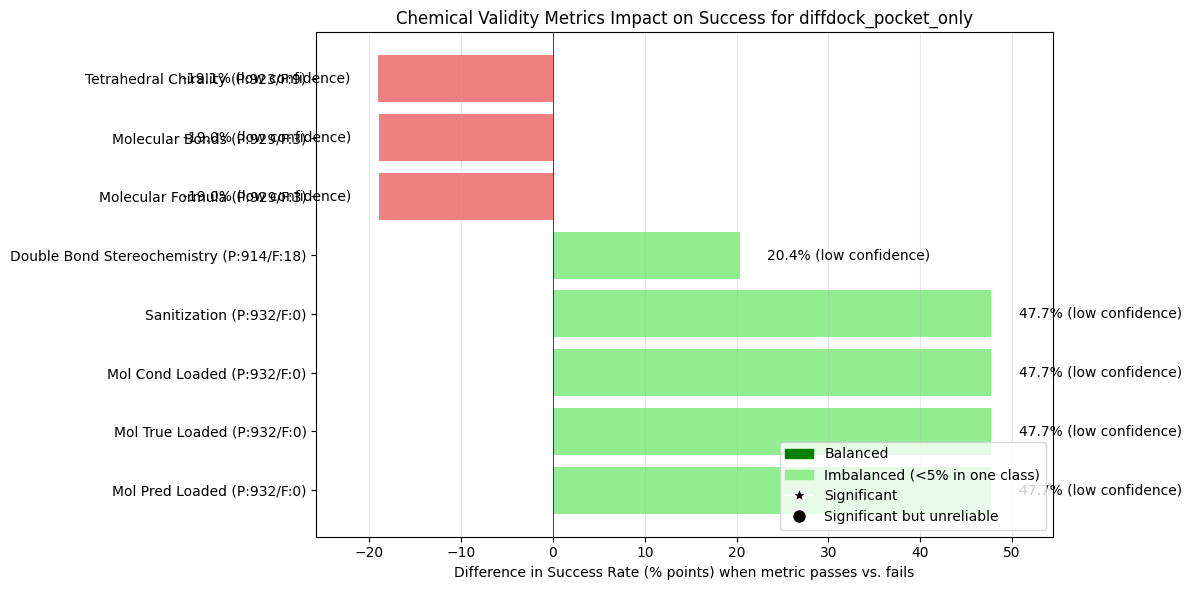

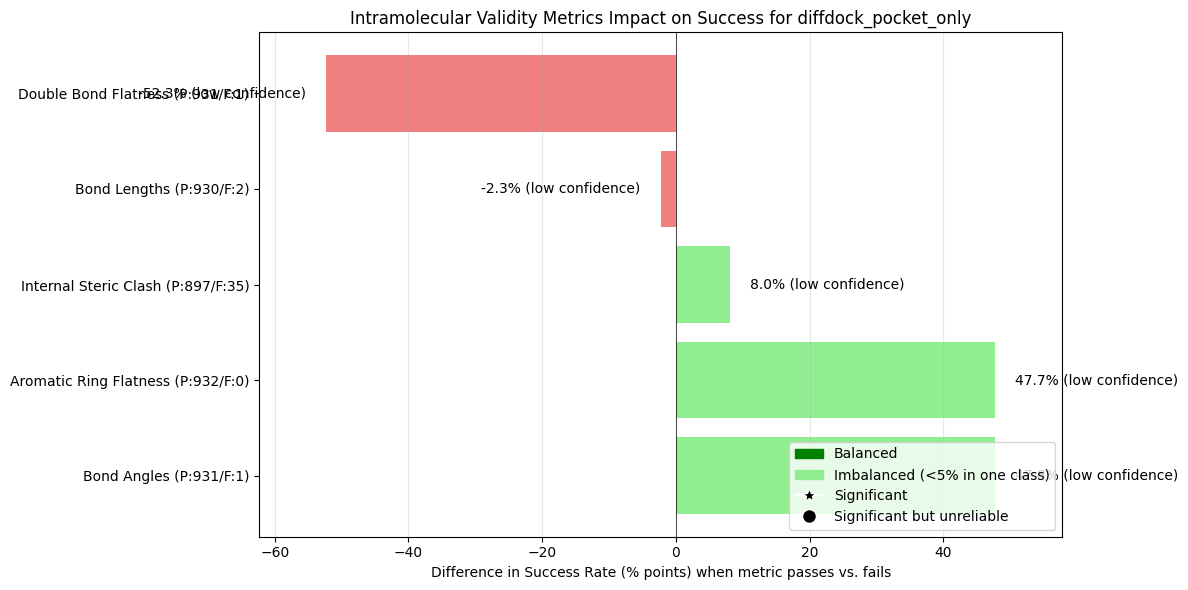

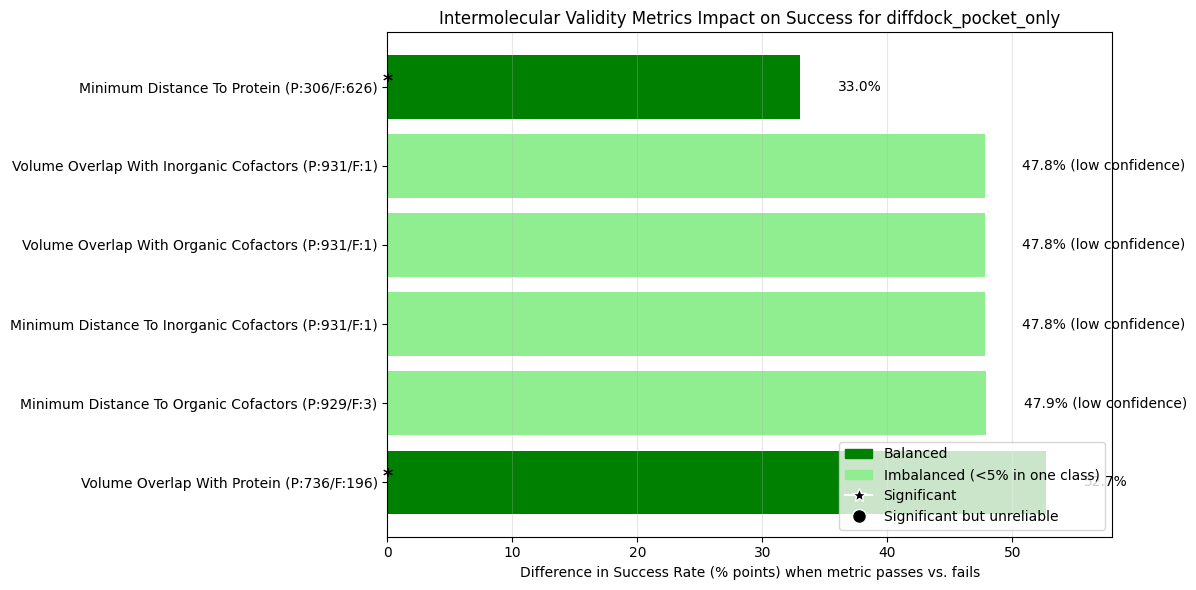


Metrics with significant impact on success rate:

Chemical Validity: No significant metrics found

Intramolecular Validity: No significant metrics found

Intermolecular Validity:
- minimum_distance_to_protein: Success rate 69.9% when pass vs. 36.9% when fail (diff: 33.0%, p=0.0000, pass/fail counts: 306/626)
- volume_overlap_with_protein: Success rate 58.8% when pass vs. 6.1% when fail (diff: 52.7%, p=0.0000, pass/fail counts: 736/196)

Note: The following metrics have severe class imbalance (one class < 5% of data):
- mol_pred_loaded: Only 0 samples (0.00%) fail this metric
- mol_true_loaded: Only 0 samples (0.00%) fail this metric
- mol_cond_loaded: Only 0 samples (0.00%) fail this metric
- sanitization: Only 0 samples (0.00%) fail this metric
- molecular_formula: Only 3 samples (0.32%) fail this metric
- molecular_bonds: Only 3 samples (0.32%) fail this metric
- tetrahedral_chirality: Only 9 samples (0.97%) fail this metric
- double_bond_stereochemistry: Only 18 samples (1.93%) fai

In [12]:
# Analyze a single method with default RMSD threshold of 2.0Å
single_method_results = analysis.analyze_single_method(
    method="diffdock_pocket_only",
    rmsd_threshold=2.0,
    imbalance_threshold=0.05,
    plot=True  # Generate visualization plots
)

# Access the results
success_rate = single_method_results['overall_success_rate']
significant_metrics = single_method_results['significant_metrics']

### chai-1

Method: chai-1
Total proteins: 916
Success rate (RMSD ≤ 2.0Å): 46.83%


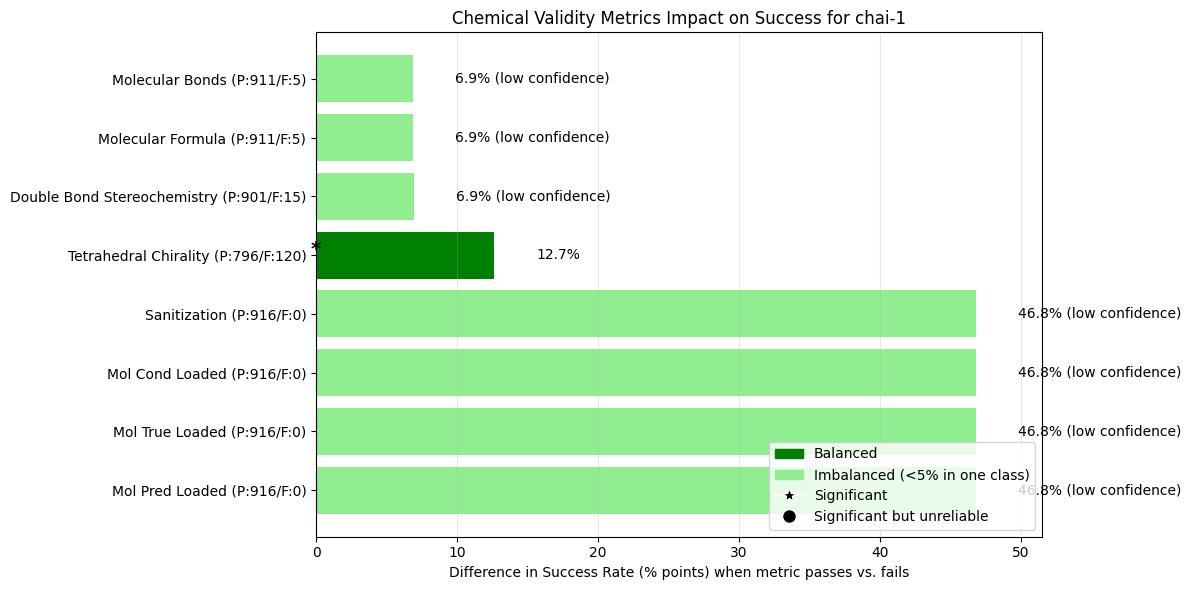

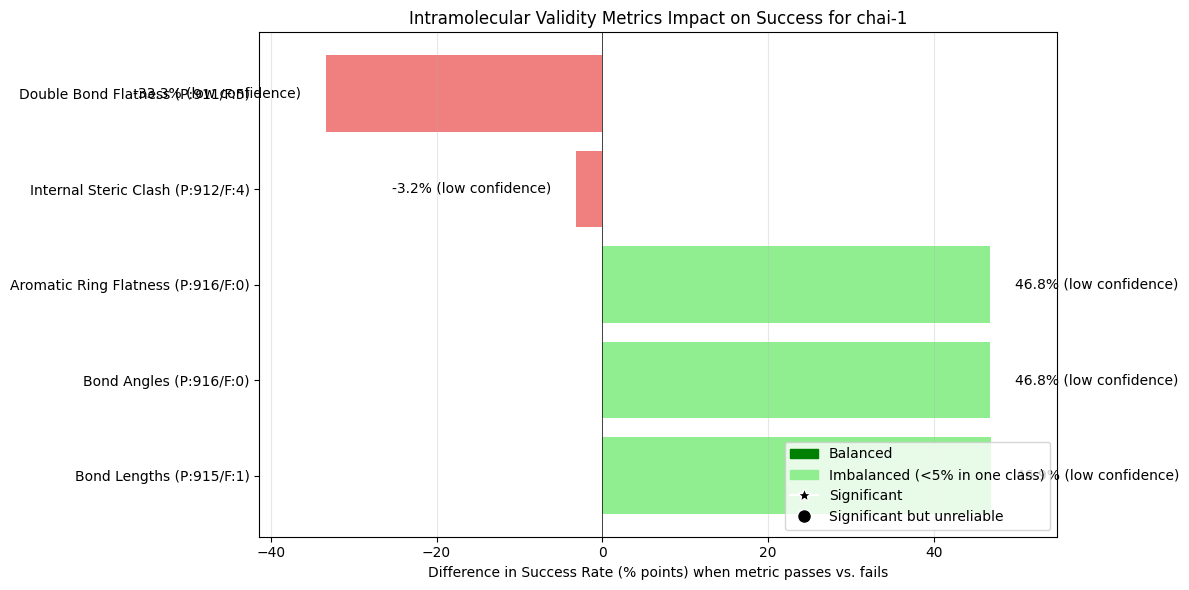

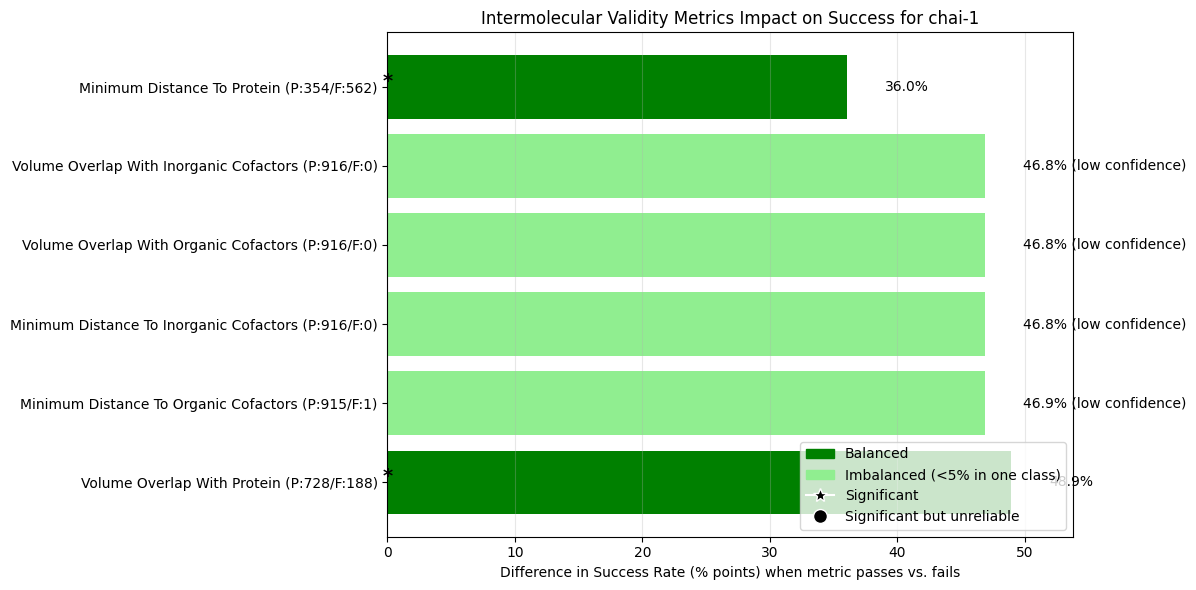


Metrics with significant impact on success rate:

Chemical Validity:
- tetrahedral_chirality: Success rate 48.5% when pass vs. 35.8% when fail (diff: 12.7%, p=0.0106, pass/fail counts: 796/120)

Intramolecular Validity: No significant metrics found

Intermolecular Validity:
- minimum_distance_to_protein: Success rate 68.9% when pass vs. 32.9% when fail (diff: 36.0%, p=0.0000, pass/fail counts: 354/562)
- volume_overlap_with_protein: Success rate 56.9% when pass vs. 8.0% when fail (diff: 48.9%, p=0.0000, pass/fail counts: 728/188)

Note: The following metrics have severe class imbalance (one class < 5% of data):
- mol_pred_loaded: Only 0 samples (0.00%) fail this metric
- mol_true_loaded: Only 0 samples (0.00%) fail this metric
- mol_cond_loaded: Only 0 samples (0.00%) fail this metric
- sanitization: Only 0 samples (0.00%) fail this metric
- molecular_formula: Only 5 samples (0.55%) fail this metric
- molecular_bonds: Only 5 samples (0.55%) fail this metric
- double_bond_stereochemist

In [13]:
# Analyze a single method with default RMSD threshold of 2.0Å
single_method_results = analysis.analyze_single_method(
    method="chai-1",
    rmsd_threshold=2.0,
    imbalance_threshold=0.05,
    plot=True  # Generate visualization plots
)

# Access the results
success_rate = single_method_results['overall_success_rate']
significant_metrics = single_method_results['significant_metrics']

## Comparative 

Analyzing PoseBusters metrics for 80 cases where diffdock_pocket_only succeeds but icm fails
and 224 cases where icm succeeds but diffdock_pocket_only fails


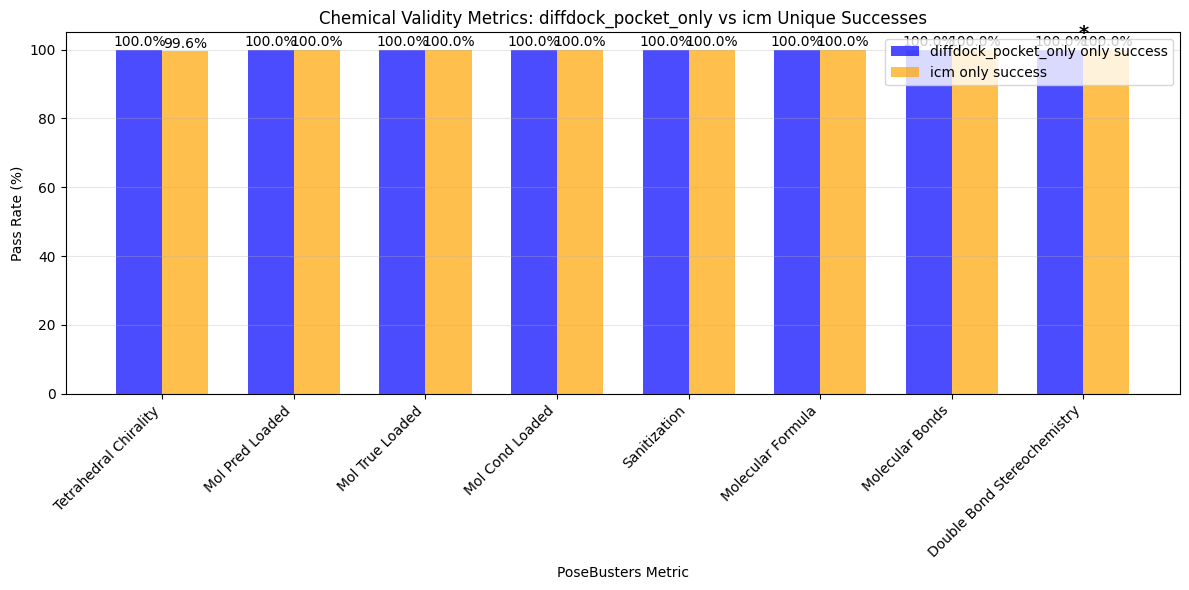

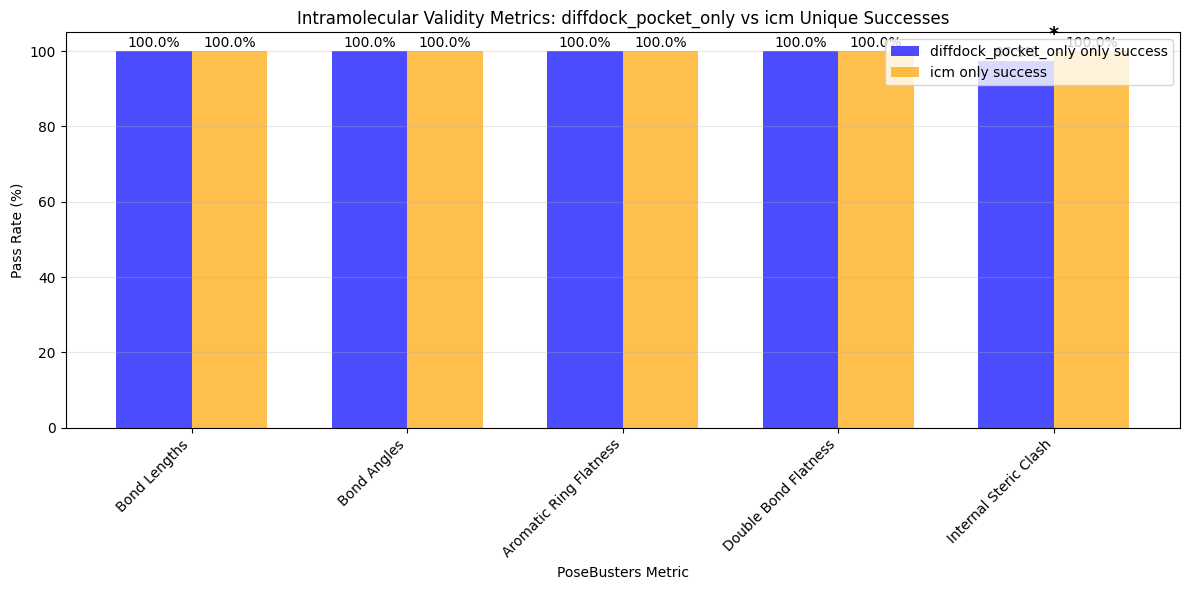

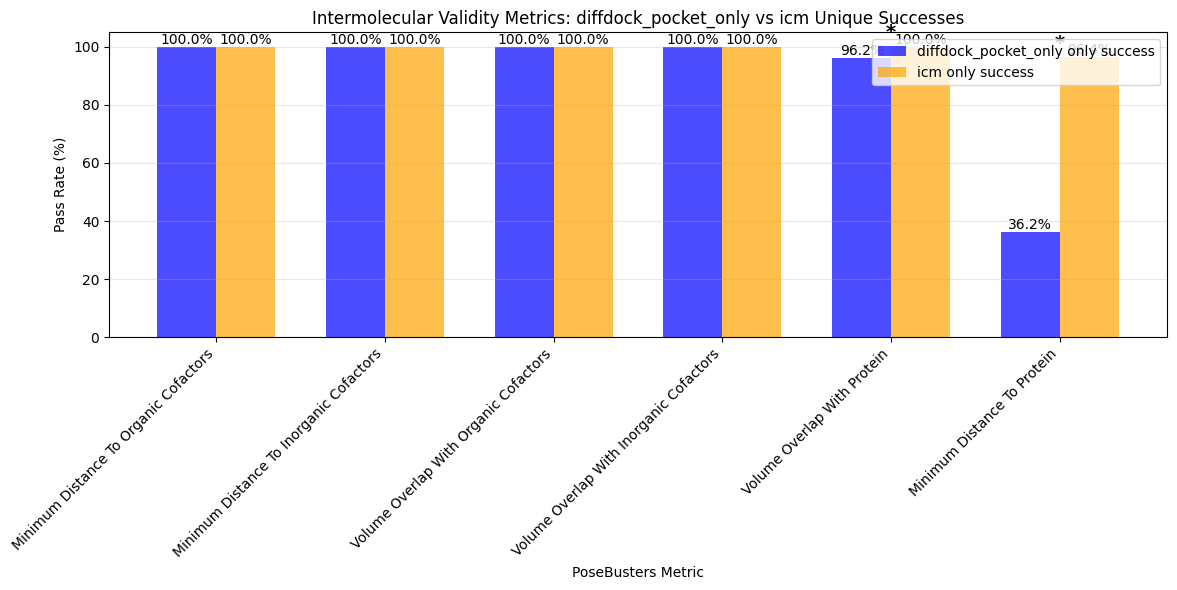

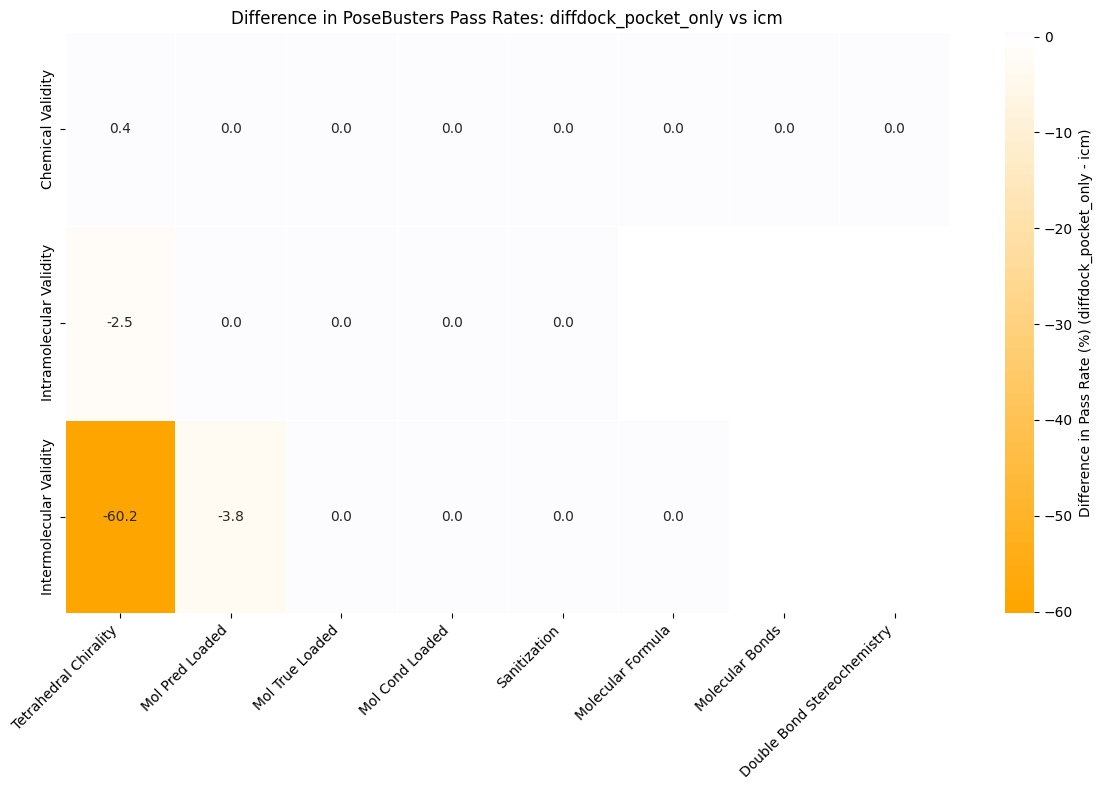


Significant differences in PoseBusters metrics (McNemar's test):
double_bond_stereochemistry: diffdock_pocket_only = 100.0%, icm = 100.0%, difference = 0.0%, p-value = 0.0010, odds ratio = 0.07
  Contingency: Both pass: 900, diffdock_pocket_only only: 1, icm only: 14, Both fail: 4
internal_steric_clash: diffdock_pocket_only = 97.5%, icm = 100.0%, difference = -2.5%, p-value = 0.0000, odds ratio = 0.03
  Contingency: Both pass: 883, diffdock_pocket_only only: 1, icm only: 34, Both fail: 1
minimum_distance_to_protein: diffdock_pocket_only = 36.2%, icm = 96.4%, difference = -60.2%, p-value = 0.0000, odds ratio = 0.01
  Contingency: Both pass: 296, diffdock_pocket_only only: 6, icm only: 600, Both fail: 17
volume_overlap_with_protein: diffdock_pocket_only = 96.2%, icm = 100.0%, difference = -3.8%, p-value = 0.0000, odds ratio = 0.01
  Contingency: Both pass: 729, diffdock_pocket_only only: 1, icm only: 189, Both fail: 0

Insights:

Chemical Validity:
- icm performs better on double_bond_s

In [14]:
comparative_results = analysis.analyze_comparative(
    method1="diffdock_pocket_only",
    method2="icm",
    rmsd_threshold=2.0,
    plot=True
)

# Access results
method1_only = comparative_results['method1_only_proteins']
method2_only = comparative_results['method2_only_proteins']
significant_metrics = comparative_results['significant_metrics']

Comparing 3 ML-based methods vs. 2 Physics-based methods
ML-based methods: diffdock_pocket_only, surfdock, chai-1
Physics-based methods: gnina, icm


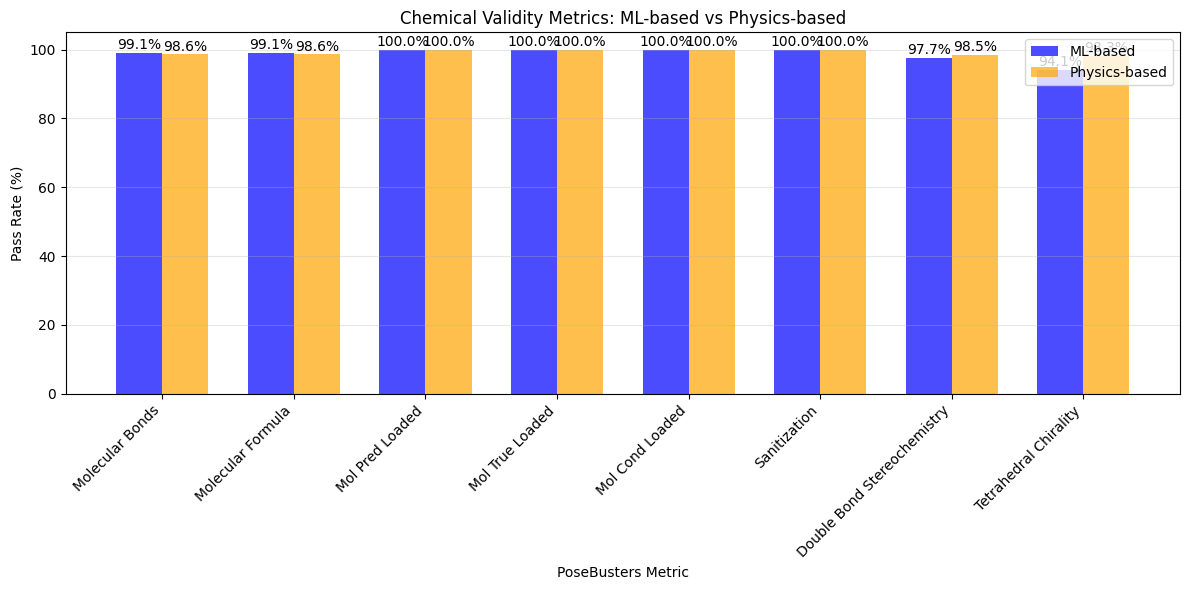

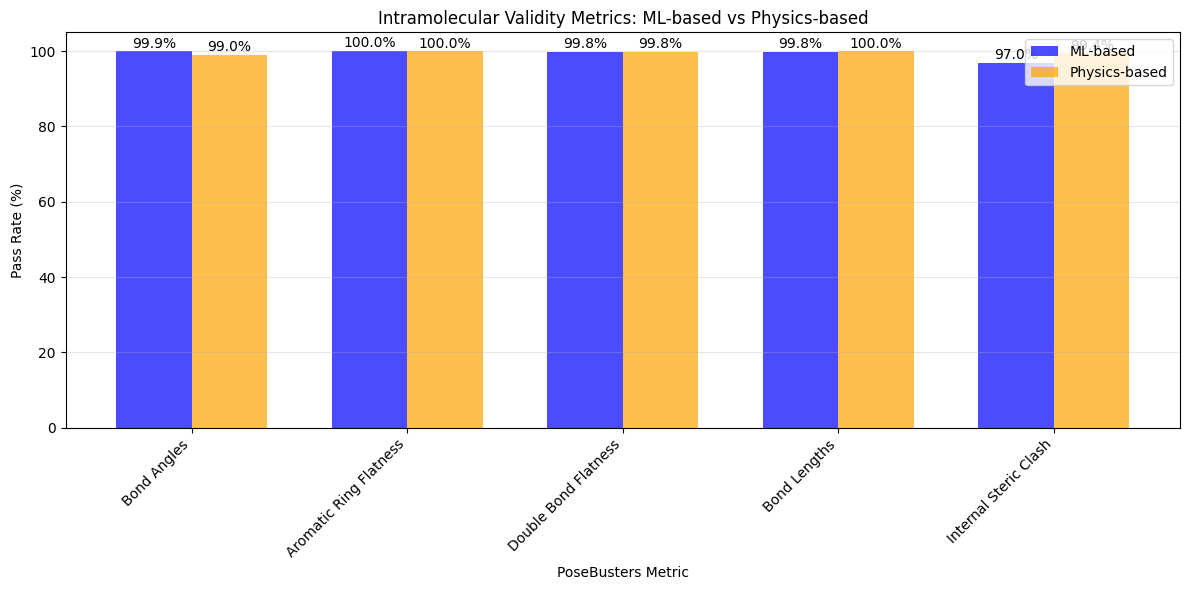

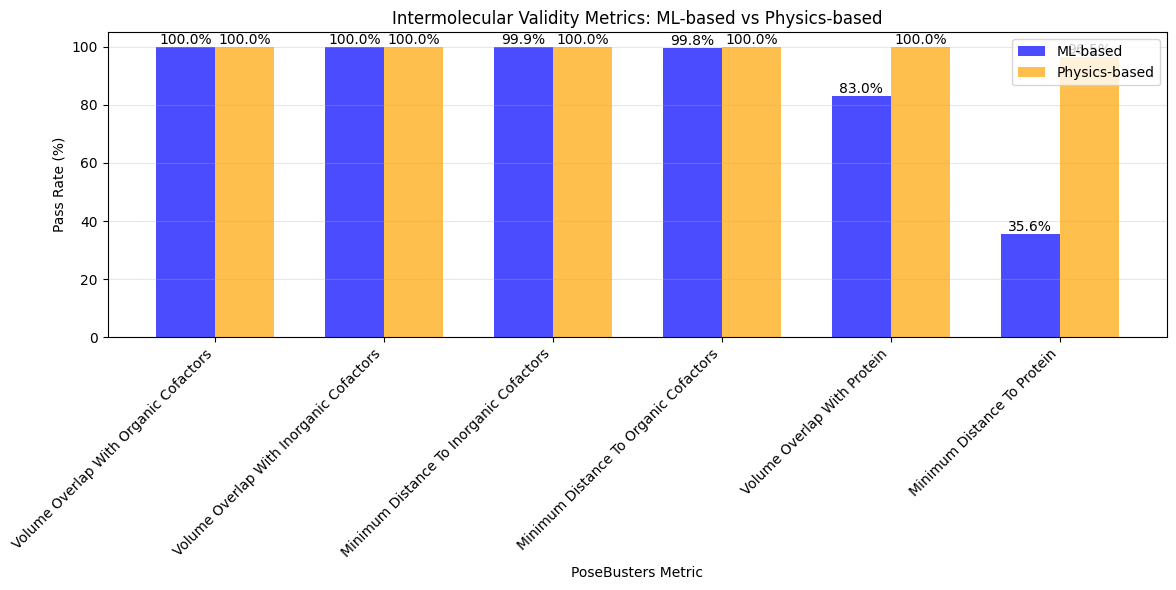

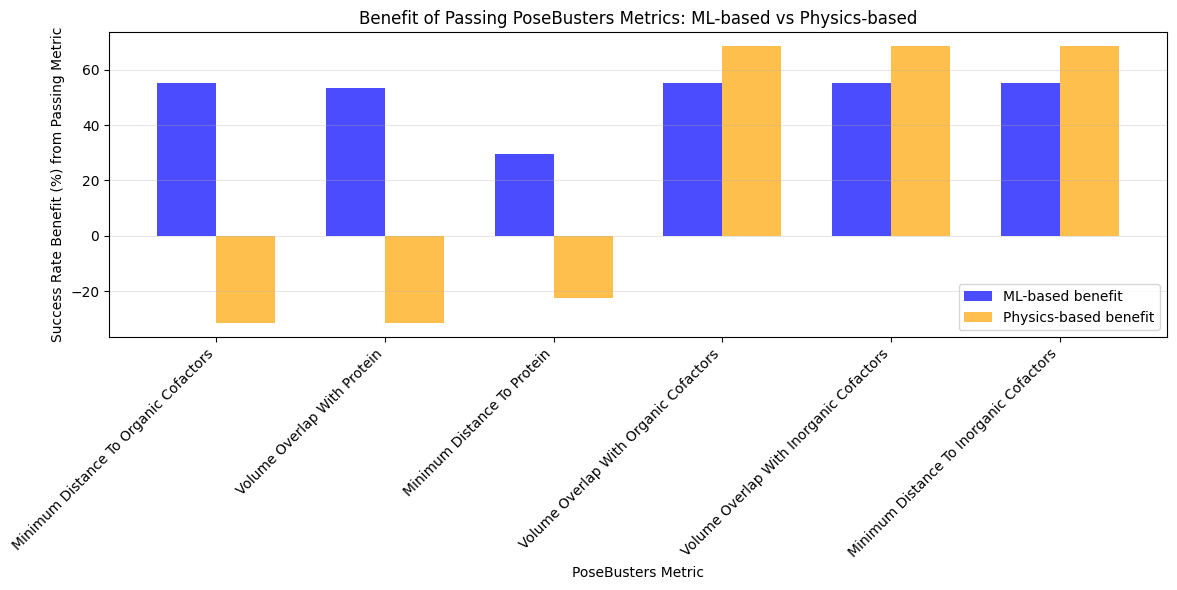

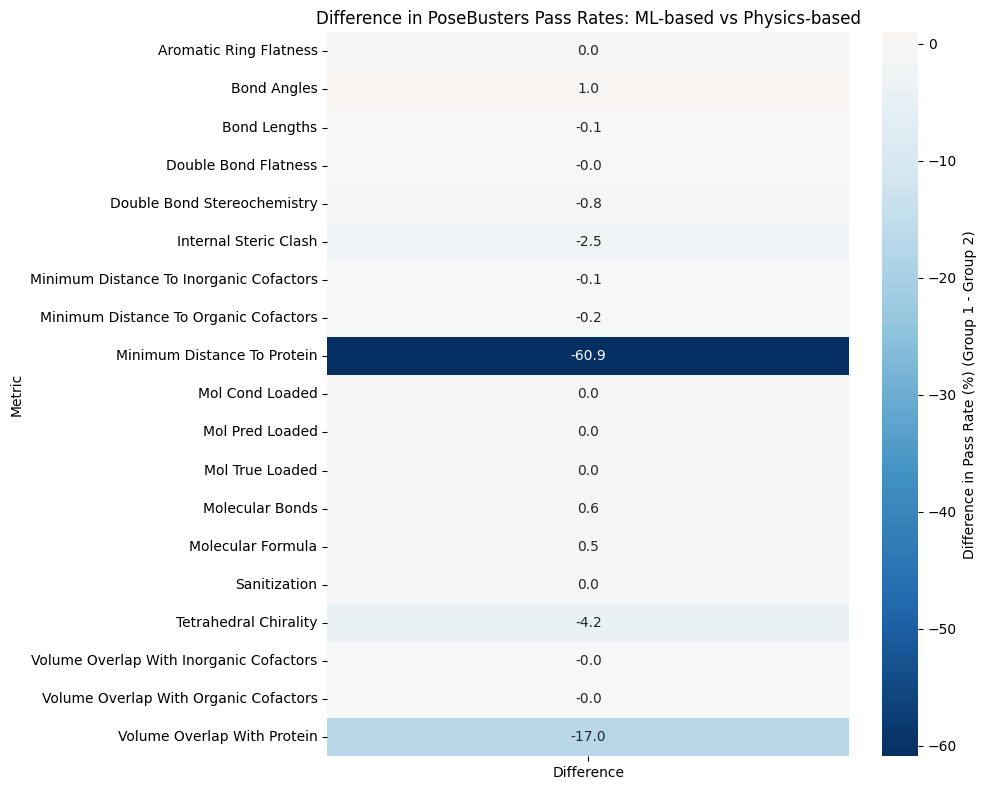


No statistically significant differences found in PoseBusters metrics between method groups.

How PoseBusters metrics affect success rates within groups:

Chemical Validity:
- molecular_bonds:
  ML-based: Success rate 54.9% when pass vs. 77.3% when fail (benefit: -22.4%)
  Physics-based: Success rate 68.2% when pass vs. 89.7% when fail (benefit: -21.5%)
- molecular_formula:
  ML-based: Success rate 54.9% when pass vs. 73.9% when fail (benefit: -19.0%)
  Physics-based: Success rate 68.2% when pass vs. 89.7% when fail (benefit: -21.5%)
- mol_pred_loaded:
  ML-based: Success rate 55.1% when pass vs. 0.0% when fail (benefit: 55.1%)
  Physics-based: Success rate 68.5% when pass vs. 0.0% when fail (benefit: 68.5%)
  Note: Physics-based benefits more from passing this metric (difference: 13.4%)
- mol_true_loaded:
  ML-based: Success rate 55.1% when pass vs. 0.0% when fail (benefit: 55.1%)
  Physics-based: Success rate 68.5% when pass vs. 0.0% when fail (benefit: 68.5%)
  Note: Physics-based 

In [15]:
ml_methods = ['diffdock_pocket_only', 'surfdock', 'chai-1']
physics_methods = ['gnina', 'icm']

group_results = analysis.analyze_method_group_comparative(
    group1_methods=ml_methods,
    group2_methods=physics_methods,
    group1_label="ML-based",
    group2_label="Physics-based",
    rmsd_threshold=2.0,
    plot=True
)

### Comparative Mixed Effect

#### minimum_distance_to_protein

                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   outcome    
No. Observations:                    5190                      Method:                               REML       
No. Groups:                          1036                      Scale:                                18.0875    
Min. group size:                     1                         Log-Likelihood:                       -15254.9107
Max. group size:                     6                         Converged:                            Yes        
Mean group size:                     5.0                                                                        
----------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------

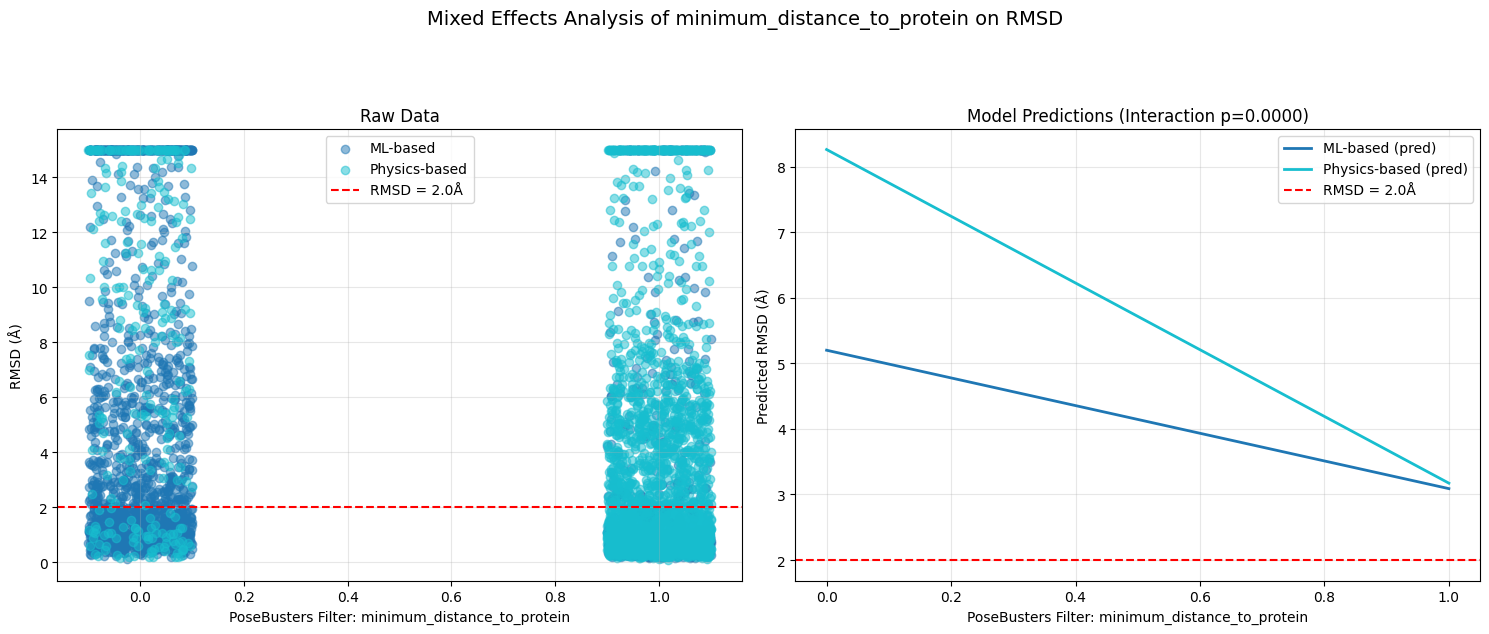

In [16]:
analysis = PoseBustersAnalysis(df_combined)
result = analysis.mixed_effect_analysis(
    filter_name='minimum_distance_to_protein',
    method_groups={
        'ML-based': ['diffdock_pocket_only', 'chai-1', 'surfdock'], 
        'Physics-based': ['vina', 'gnina', 'icm']
    },
    rmsd_threshold=2.0,
    outcome_type='rmsd',
    plot=True
)
# Access model and results
# print("Model:", result['model'].summary())
# print("Interaction p-value:", result['p_interaction'])

                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   outcome    
No. Observations:                    4158                      Method:                               REML       
No. Groups:                          1024                      Scale:                                20.8788    
Min. group size:                     1                         Log-Likelihood:                       -12514.8443
Max. group size:                     5                         Converged:                            Yes        
Mean group size:                     4.1                                                                        
----------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------

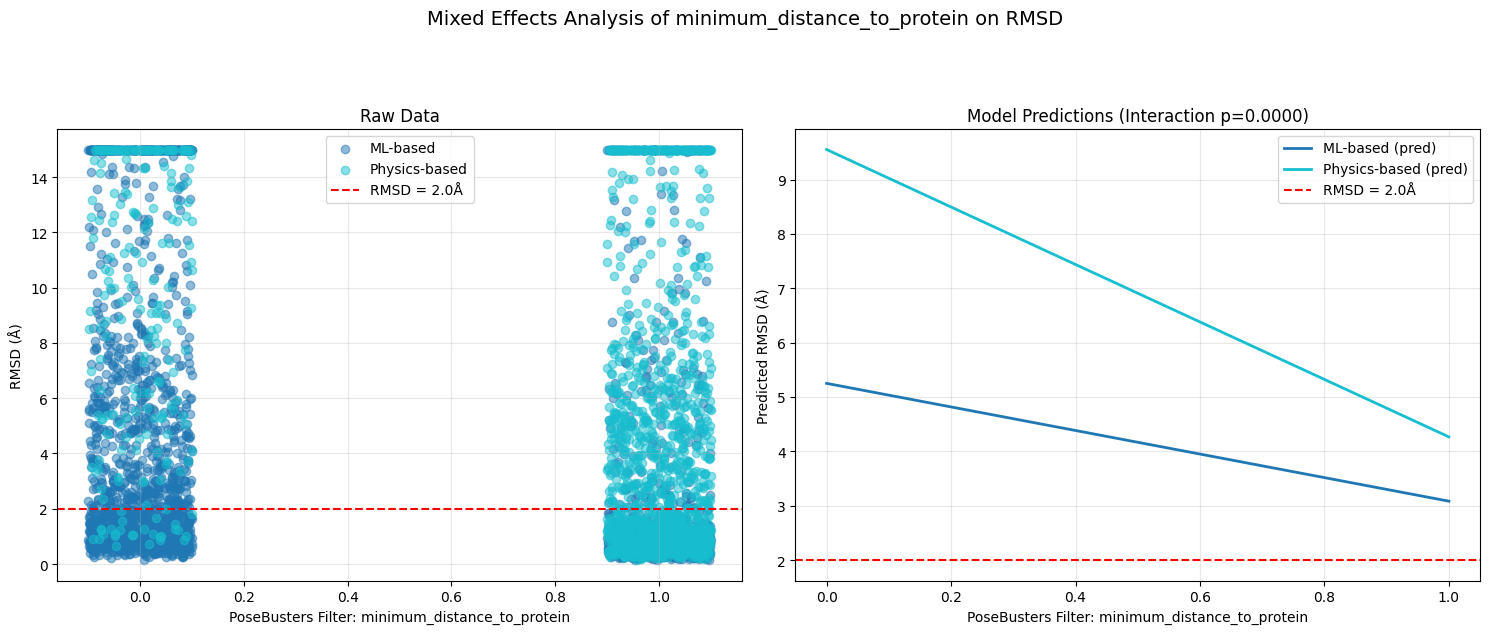

In [25]:
result = analysis.mixed_effect_analysis(
    filter_name="minimum_distance_to_protein",
    method_groups={
        'ML-based': ['diffdock_pocket_only', 'chai-1', 'surfdock'], 
        'Physics-based': ['vina', 'icm']
    },
    rmsd_threshold=2.0,
    outcome_type='rmsd',
    plot=True
)

#### all

Property: mol_pred_loaded
Error fitting mixed effects model: Singular matrix
Property: mol_true_loaded
Error fitting mixed effects model: Singular matrix
Property: mol_cond_loaded
Error fitting mixed effects model: Singular matrix
Property: sanitization
Error fitting mixed effects model: Singular matrix
Property: molecular_formula


/Users/aoxu/projects/DrugDiscovery/PoseBench/notebooks/plinder_analysis_utils.py:1404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['outcome'] = np.clip(analysis_df['rmsd'], None, 15.0)


                                Mixed Linear Model Regression Results
Model:                           MixedLM                Dependent Variable:                outcome    
No. Observations:                4053                   Method:                            REML       
No. Groups:                      1004                   Scale:                             17.6852    
Min. group size:                 1                      Log-Likelihood:                    -11932.8711
Max. group size:                 5                      Converged:                         Yes        
Mean group size:                 4.0                                                                  
------------------------------------------------------------------------------------------------------
                                                           Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
------------------------------------------------------------------------------------------------------
Int

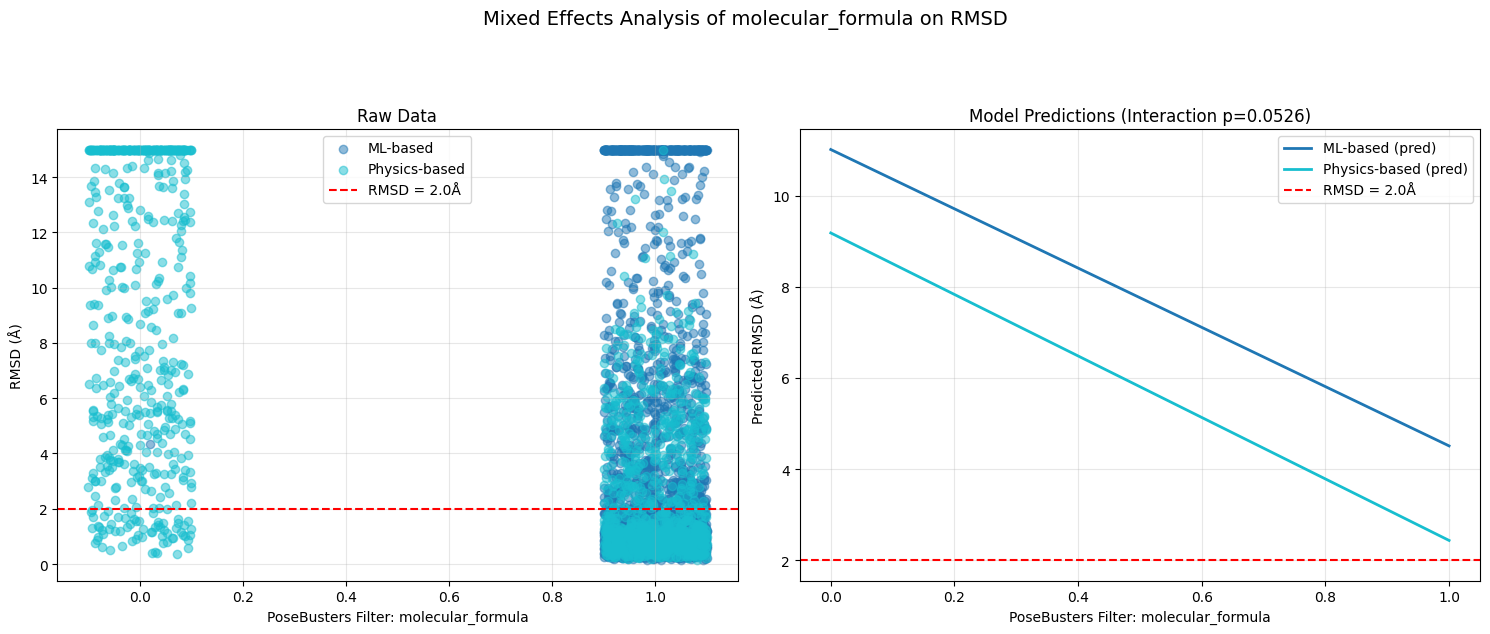

Property: molecular_bonds


/Users/aoxu/projects/DrugDiscovery/PoseBench/notebooks/plinder_analysis_utils.py:1404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['outcome'] = np.clip(analysis_df['rmsd'], None, 15.0)


Error fitting mixed effects model: Singular matrix
Property: tetrahedral_chirality


/Users/aoxu/projects/DrugDiscovery/PoseBench/notebooks/plinder_analysis_utils.py:1404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['outcome'] = np.clip(analysis_df['rmsd'], None, 15.0)


                                  Mixed Linear Model Regression Results
Model:                            MixedLM                 Dependent Variable:                 outcome    
No. Observations:                 4053                    Method:                             REML       
No. Groups:                       1004                    Scale:                              18.8296    
Min. group size:                  1                       Log-Likelihood:                     -12035.3786
Max. group size:                  5                       Converged:                          Yes        
Mean group size:                  4.0                                                                    
---------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------

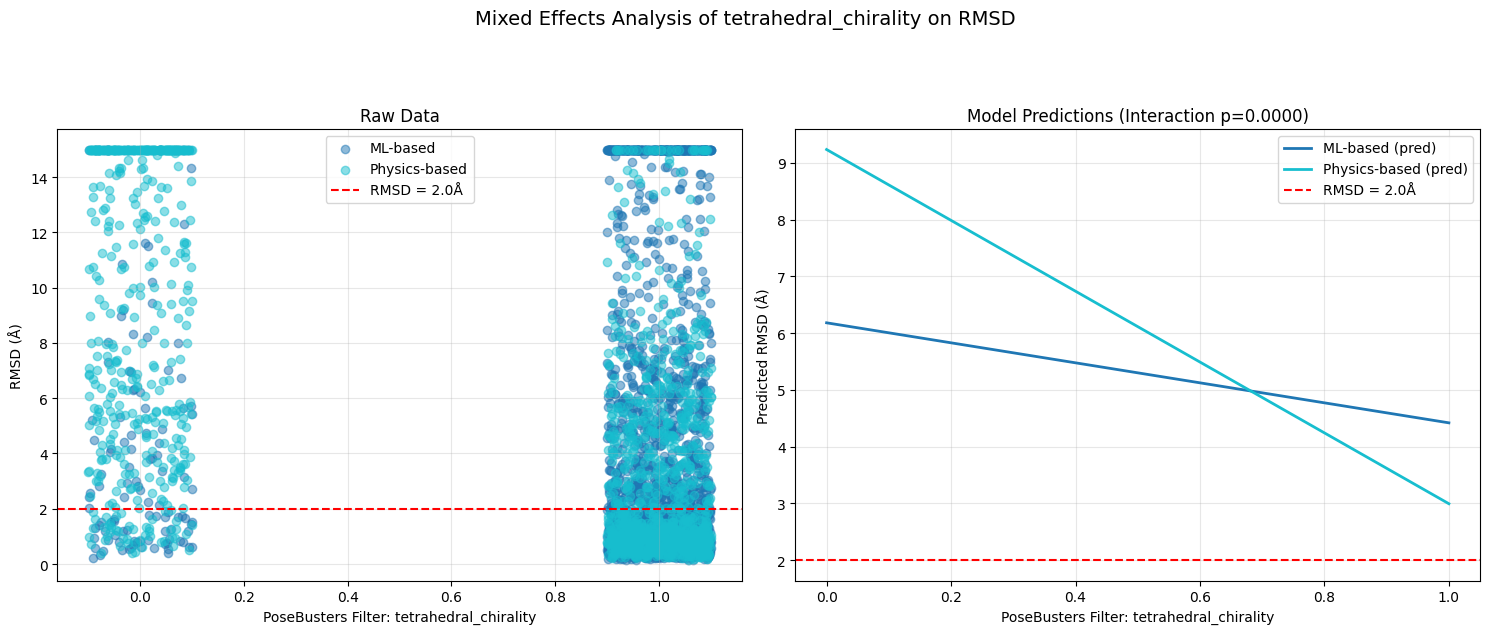

Property: double_bond_stereochemistry


/Users/aoxu/projects/DrugDiscovery/PoseBench/notebooks/plinder_analysis_utils.py:1404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['outcome'] = np.clip(analysis_df['rmsd'], None, 15.0)


                                     Mixed Linear Model Regression Results
Model:                              MixedLM                   Dependent Variable:                   outcome    
No. Observations:                   4053                      Method:                               REML       
No. Groups:                         1004                      Scale:                                22.0909    
Min. group size:                    1                         Log-Likelihood:                       -12328.9583
Max. group size:                    5                         Converged:                            Yes        
Mean group size:                    4.0                                                                        
---------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------

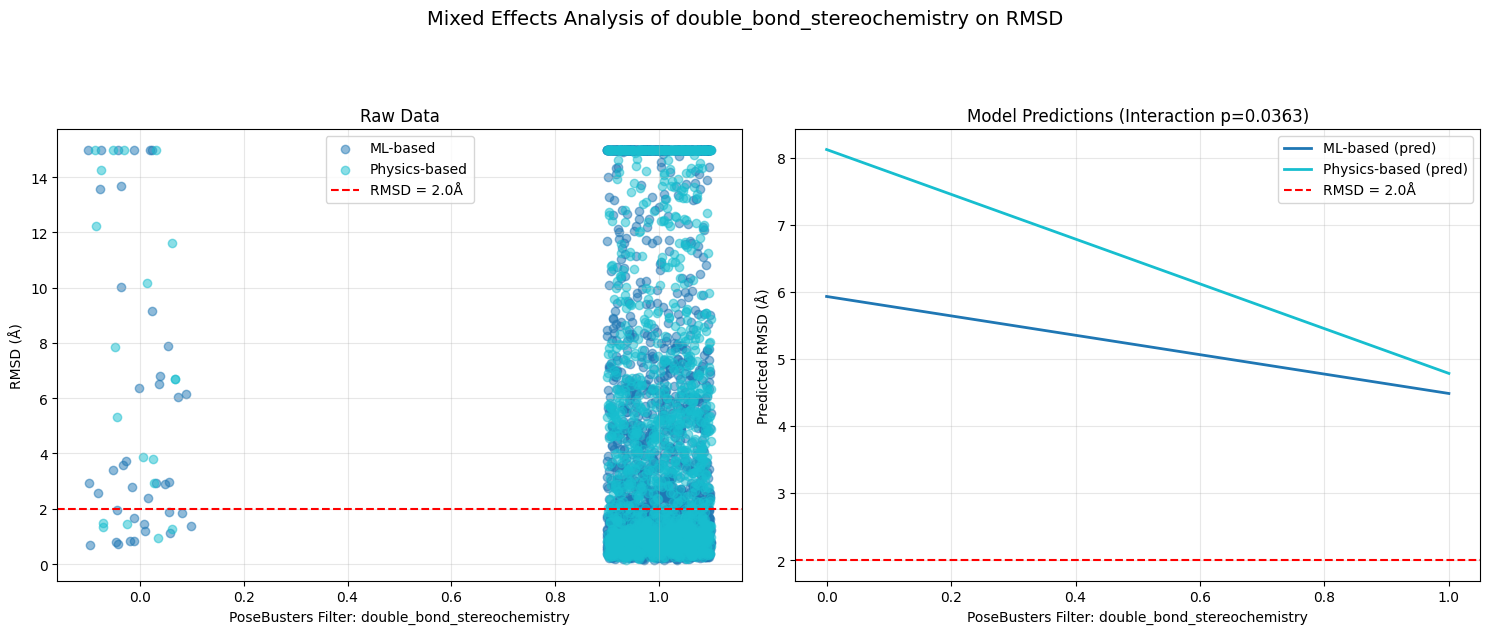

Property: bond_lengths
Error fitting mixed effects model: Singular matrix
Property: bond_angles
                             Mixed Linear Model Regression Results
Model:                         MixedLM              Dependent Variable:              outcome    
No. Observations:              4158                 Method:                          REML       
No. Groups:                    1024                 Scale:                           22.7503    
Min. group size:               1                    Log-Likelihood:                  -12674.3507
Max. group size:               5                    Converged:                       Yes        
Mean group size:               4.1                                                              
------------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-------------------------------------------------------------

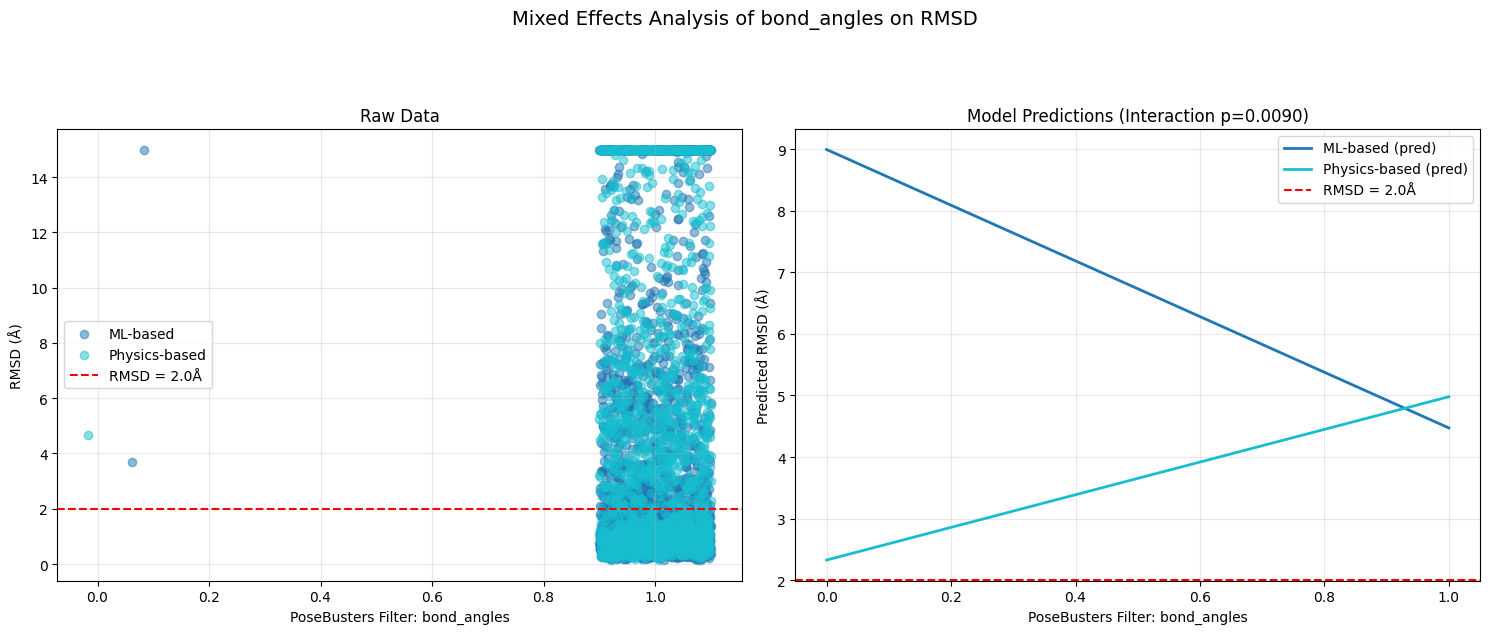

Property: internal_steric_clash
                                  Mixed Linear Model Regression Results
Model:                            MixedLM                 Dependent Variable:                 outcome    
No. Observations:                 4158                    Method:                             REML       
No. Groups:                       1024                    Scale:                              22.7477    
Min. group size:                  1                       Log-Likelihood:                     -12675.5873
Max. group size:                  5                       Converged:                          Yes        
Mean group size:                  4.1                                                                    
---------------------------------------------------------------------------------------------------------
                                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------

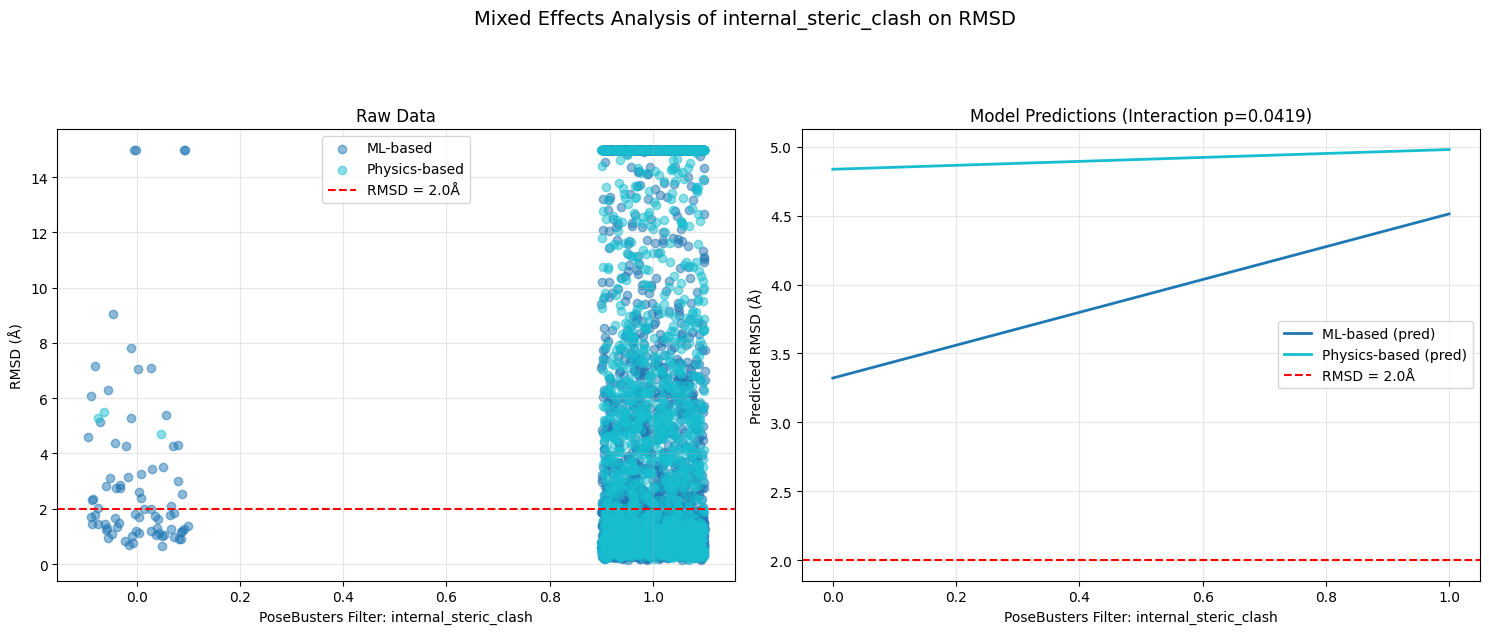

Property: aromatic_ring_flatness
Error fitting mixed effects model: Singular matrix
Property: double_bond_flatness
                                  Mixed Linear Model Regression Results
Model:                            MixedLM                 Dependent Variable:                 outcome    
No. Observations:                 4158                    Method:                             REML       
No. Groups:                       1024                    Scale:                              22.7746    
Min. group size:                  1                       Log-Likelihood:                     -12674.6921
Max. group size:                  5                       Converged:                          Yes        
Mean group size:                  4.1                                                                    
---------------------------------------------------------------------------------------------------------
                                                              Coef.  St

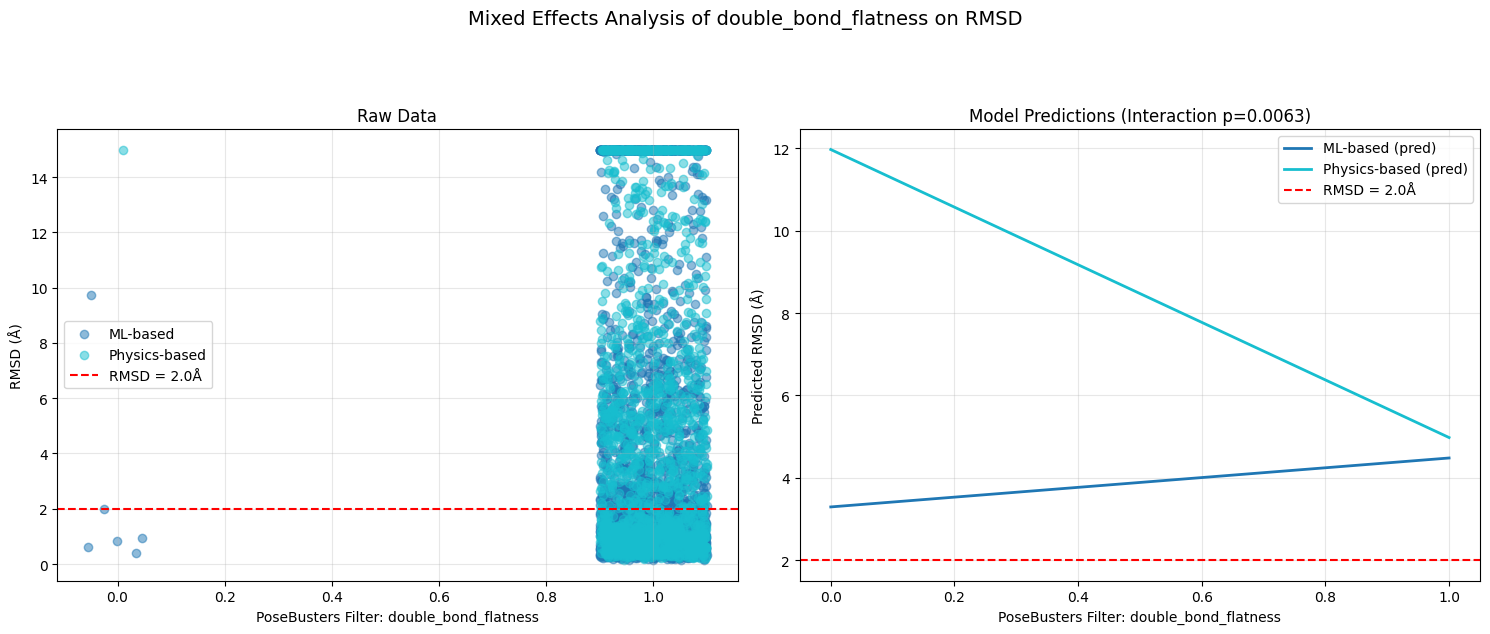

Property: internal_energy
Filter 'internal_energy' not found in available PoseBusters metrics.
Property: minimum_distance_to_protein
                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   outcome    
No. Observations:                    4158                      Method:                               REML       
No. Groups:                          1024                      Scale:                                20.8788    
Min. group size:                     1                         Log-Likelihood:                       -12514.8443
Max. group size:                     5                         Converged:                            Yes        
Mean group size:                     4.1                                                                        
----------------------------------------------------------------------------------------------------------------
 

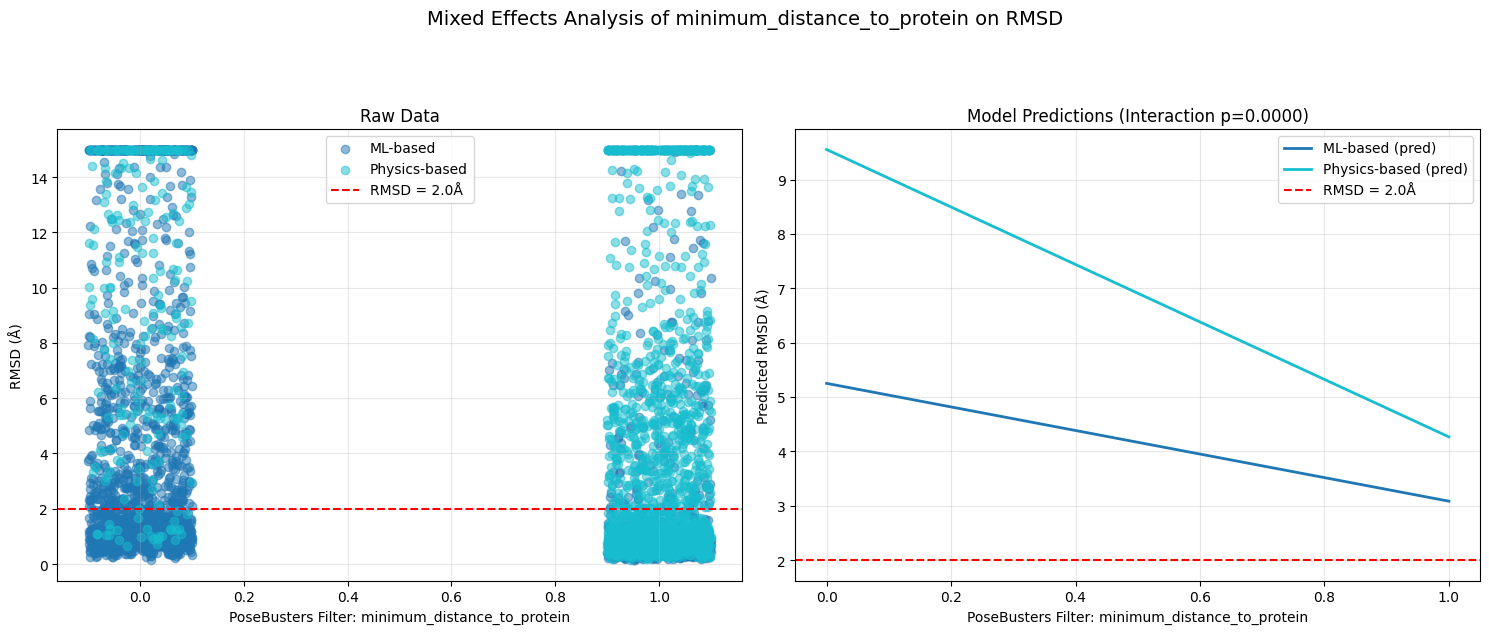

Property: minimum_distance_to_organic_cofactors
                                          Mixed Linear Model Regression Results
Model:                                  MixedLM                      Dependent Variable:                      outcome    
No. Observations:                       4158                         Method:                                  REML       
No. Groups:                             1024                         Scale:                                   22.7651    
Min. group size:                        1                            Log-Likelihood:                          -12676.2709
Max. group size:                        5                            Converged:                               Yes        
Mean group size:                        4.1                                                                              
-------------------------------------------------------------------------------------------------------------------------
                  

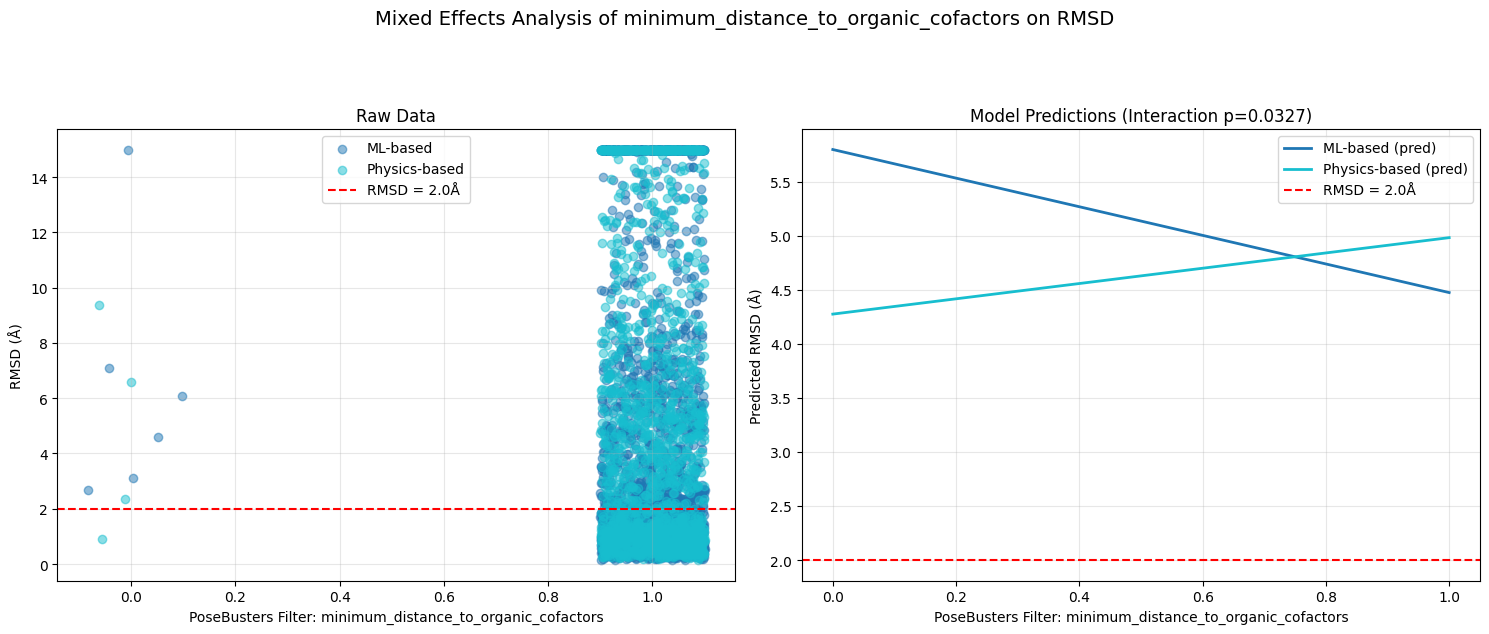

Property: minimum_distance_to_inorganic_cofactors
                                           Mixed Linear Model Regression Results
Model:                                   MixedLM                       Dependent Variable:                       outcome    
No. Observations:                        4158                          Method:                                   REML       
No. Groups:                              1024                          Scale:                                    22.7377    
Min. group size:                         1                             Log-Likelihood:                           -12674.6056
Max. group size:                         5                             Converged:                                Yes        
Mean group size:                         4.1                                                                                
-----------------------------------------------------------------------------------------------------------------------

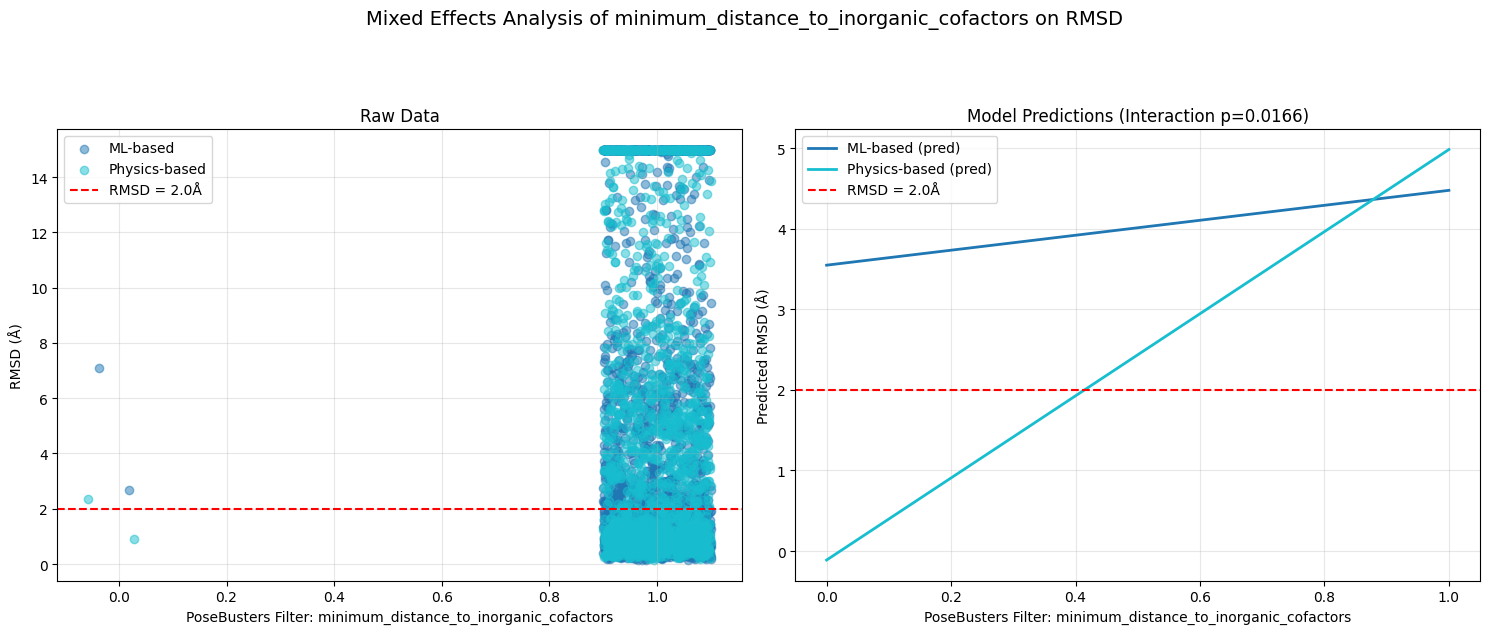

Property: volume_overlap_with_protein
                                     Mixed Linear Model Regression Results
Model:                               MixedLM                   Dependent Variable:                   outcome    
No. Observations:                    4158                      Method:                               REML       
No. Groups:                          1024                      Scale:                                18.5539    
Min. group size:                     1                         Log-Likelihood:                       -12295.9275
Max. group size:                     5                         Converged:                            Yes        
Mean group size:                     4.1                                                                        
----------------------------------------------------------------------------------------------------------------
                                                                     Coef.  Std.Err.    z    P>|

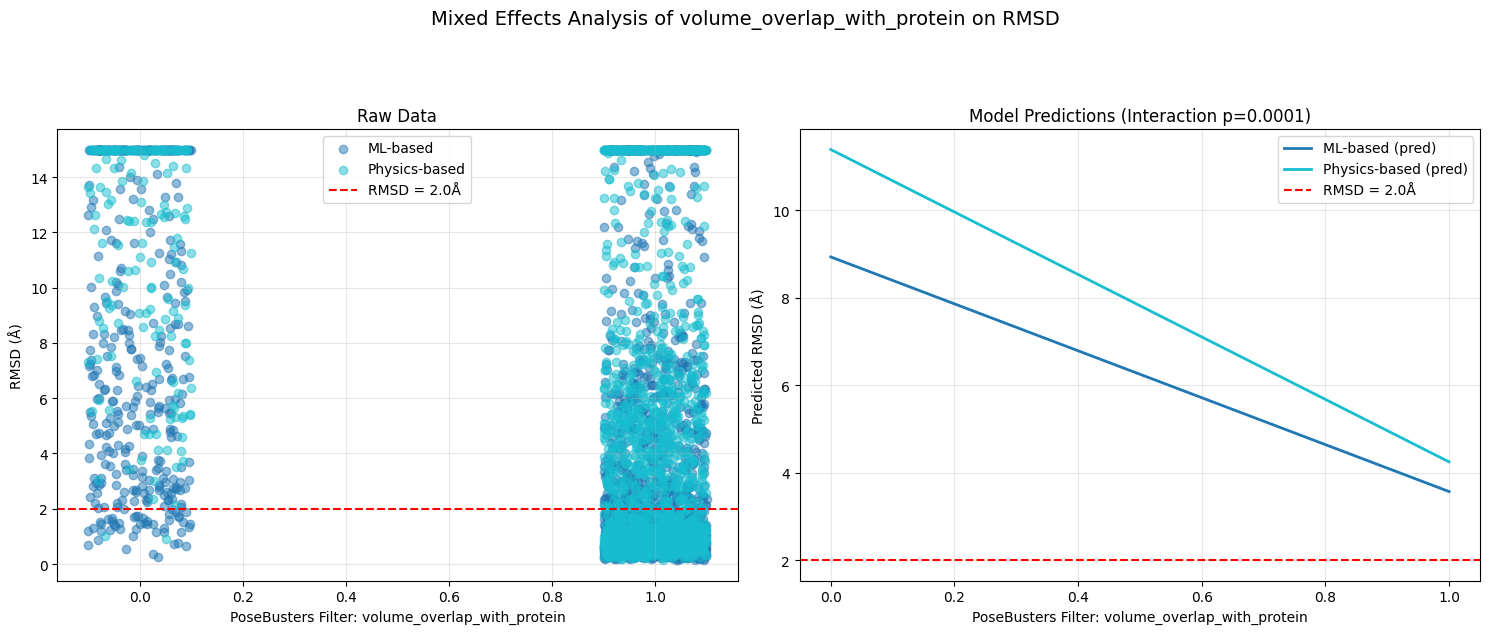

Property: volume_overlap_with_organic_cofactors
                                          Mixed Linear Model Regression Results
Model:                                   MixedLM                      Dependent Variable:                      outcome    
No. Observations:                        4158                         Method:                                  REML       
No. Groups:                              1024                         Scale:                                   22.7627    
Min. group size:                         1                            Log-Likelihood:                          -12675.1643
Max. group size:                         5                            Converged:                               Yes        
Mean group size:                         4.1                                                                              
--------------------------------------------------------------------------------------------------------------------------
           

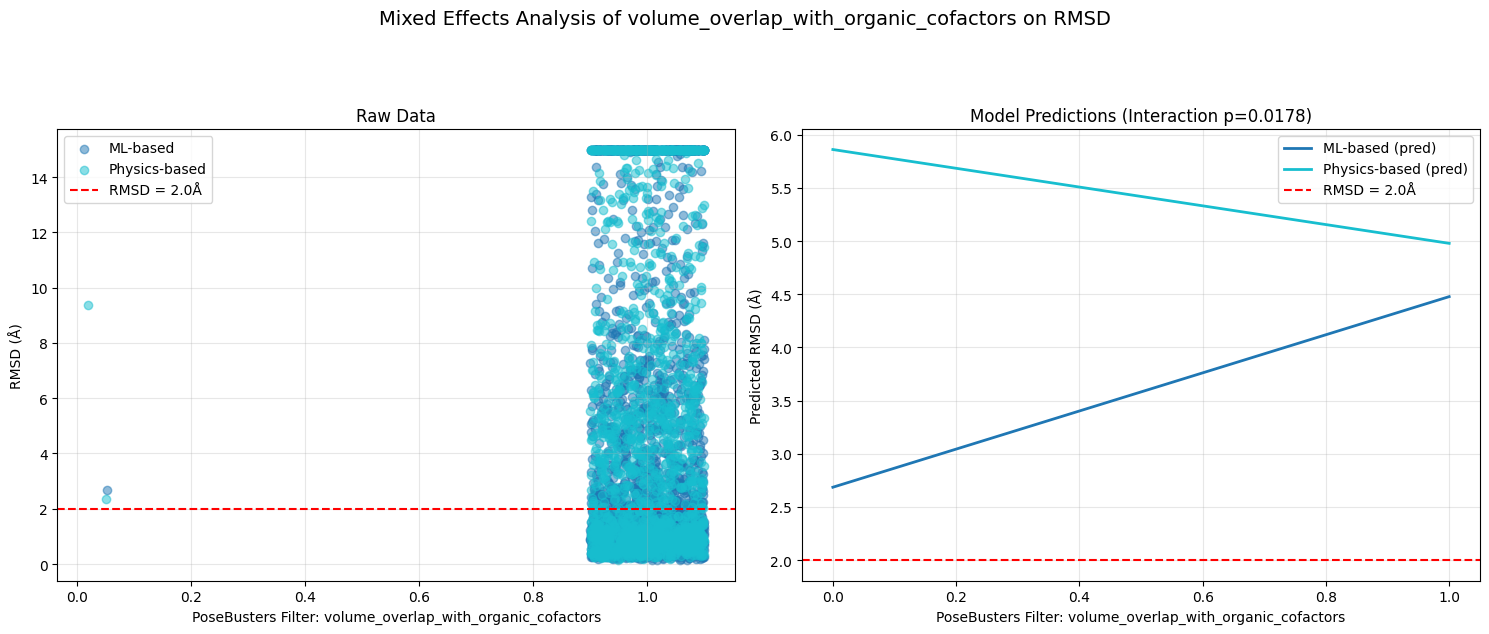

Property: volume_overlap_with_inorganic_cofactors
                                           Mixed Linear Model Regression Results
Model:                                   MixedLM                       Dependent Variable:                       outcome    
No. Observations:                        4158                          Method:                                   REML       
No. Groups:                              1024                          Scale:                                    22.7627    
Min. group size:                         1                             Log-Likelihood:                           -12675.1643
Max. group size:                         5                             Converged:                                Yes        
Mean group size:                         4.1                                                                                
-----------------------------------------------------------------------------------------------------------------------

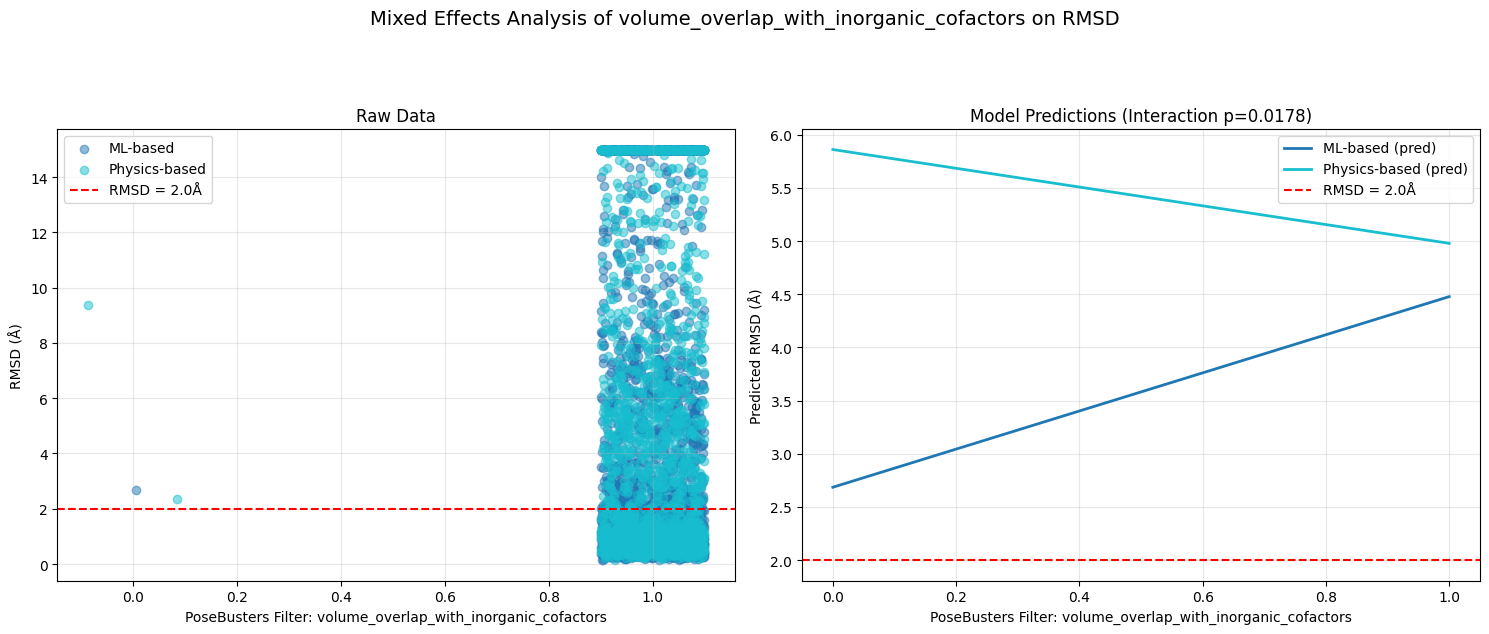

In [18]:
for prop in BUST_TEST_COLUMNS[1:]:
    print("Property:", prop)
    result = analysis.mixed_effect_analysis(
        filter_name=prop,
        method_groups={
            'ML-based': ['diffdock_pocket_only', 'chai-1', 'surfdock'], 
            'Physics-based': ['vina', 'icm']
        },
        rmsd_threshold=2.0,
        outcome_type='rmsd',
        plot=True
    )